In [1]:
# !pip install sentencepiece
# !pip install konlpy
# !git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
# %cd Mecab-ko-for-Google-Colab/
# !bash install_mecab-ko_on_colab_light_220429.sh

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

train_path = "ratings_train.txt"
test_path  = "ratings_test.txt"

train_df = pd.read_csv(train_path, sep="\t", encoding="utf-8")
test_df  = pd.read_csv(test_path,  sep="\t", encoding="utf-8")

train_df = train_df.drop(columns=["id"])
test_df = test_df.drop(columns=["id"])

print(len(train_df))
print(len(test_df))

train_df = train_df.dropna()
test_df  = test_df.dropna()

train_df = train_df.drop_duplicates()
test_df  = test_df.drop_duplicates()

150000
50000


In [11]:
train_df.head()

,document,label
0,아 더빙.. 진짜 짜증나네요 목소리,0
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0
3,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [12]:
test_df.head()

,document,label
0,굳 ㅋ,1
1,GDNTOPCLASSINTHECLUB,0
2,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


count    146339.000000
mean         35.948394
std          29.493012
min           1.000000
25%          16.000000
50%          27.000000
75%          43.000000
max         146.000000
Name: doc_length, dtype: float64


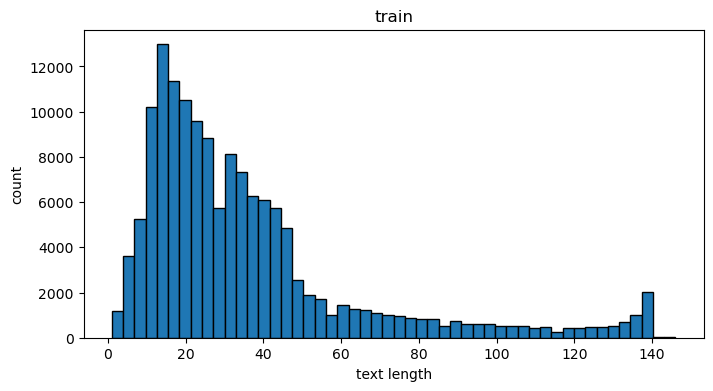

In [13]:
train_df["doc_length"] = train_df["document"].astype(str).str.len()

print(train_df["doc_length"].describe())

plt.figure(figsize=(8,4))
plt.hist(train_df["doc_length"], bins=50, edgecolor="black")
plt.xlabel("text length")
plt.ylabel("count")
plt.title("train")
plt.show()

In [14]:
text_1 = train_df[train_df["doc_length"] == 1]
text_1.head()

,document,label,doc_length
151,아,0,1
384,잼,1,1
584,1,0,1
593,4,0,1
1723,굿,1,1


In [17]:
text_16 = train_df[train_df["doc_length"] == 16]
text_16.head()

,document,label,doc_length
10,걍인피니트가짱이다.진짜짱이다♥,1,16
15,ㄱ냥 매번 긴장되고 재밋음ㅠㅠ,1,16
32,재밌는데 별점이 왜이리 낮은고,1,16
40,단순하면서 은은한 매력의 영화,1,16
83,이건 뭐냐? 우뢰매냐? ;;;,0,16


In [18]:
text_43 = train_df[train_df["doc_length"] == 43]
text_43.head()

,document,label,doc_length
11,볼때마다 눈물나서 죽겠다90년대의 향수자극!!허진호는 감성절제멜로의 달인이다~,1,43
262,아 OOO기.. 이걸 본 내눈이 아깝다 ㅡㅡ 진짜 아놔 진짜 OOO기명작이네요,0,43
367,진 짜 리얼 개 쓰레기 영화 . 다 보고 나면 정말 찝찝해지는 영화 절대보지마,0,43
378,절망과 슬픔 속에서도 자신을 챙겨야만하는 삶의 잔인함을 거부한 비참함에 대하여,1,43
447,와 이연서님 신인답지 않은 연기력 잘 봤습니다 다음 작품에서 또 뵙길 바랍니다,1,43


In [20]:
q1 = 16
q3 = 43
iqr = q3 - q1
lb = max(0, 16 - 1.5 * iqr)
ub = 43 + 1.5 * iqr
print(lb)
print(ub)

0
83.5


#### Sentencepiece Tokenizer (unigram)

합쳐진 전체 데이터셋 크기: 192668


sentencepiece_trainer.cc(78) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_corpus.txt
  input_format: 
  model_prefix: spm_unigram
  model_type: UNIGRAM
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 1000000
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  seed_sentencepieces_file: 
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 1
  bos_id: -1
  eos_id: -1
  pad_id: 0
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
  enable_differential_privac

모델 학습용 데이터셋 크기: 115854
모델 검증용 데이터셋 크기: 28964
모델 테스트용 데이터셋 크기: 48740


Evaluating: 100%|██████████| 906/906 [00:02<00:00, 413.74it/s]


[Epoch 1/5] Train Loss: 0.4593, Acc: 0.7784 | Val Loss: 0.3664, Acc: 0.8390


Evaluating: 100%|██████████| 906/906 [00:02<00:00, 418.41it/s]


[Epoch 2/5] Train Loss: 0.3224, Acc: 0.8615 | Val Loss: 0.3430, Acc: 0.8491


Evaluating: 100%|██████████| 906/906 [00:02<00:00, 436.40it/s]


[Epoch 3/5] Train Loss: 0.2746, Acc: 0.8845 | Val Loss: 0.3483, Acc: 0.8501


Evaluating: 100%|██████████| 906/906 [00:02<00:00, 432.40it/s]


[Epoch 4/5] Train Loss: 0.2387, Acc: 0.8999 | Val Loss: 0.4079, Acc: 0.8208


Evaluating: 100%|██████████| 906/906 [00:02<00:00, 436.19it/s]


[Epoch 5/5] Train Loss: 0.2162, Acc: 0.9108 | Val Loss: 0.3819, Acc: 0.8512


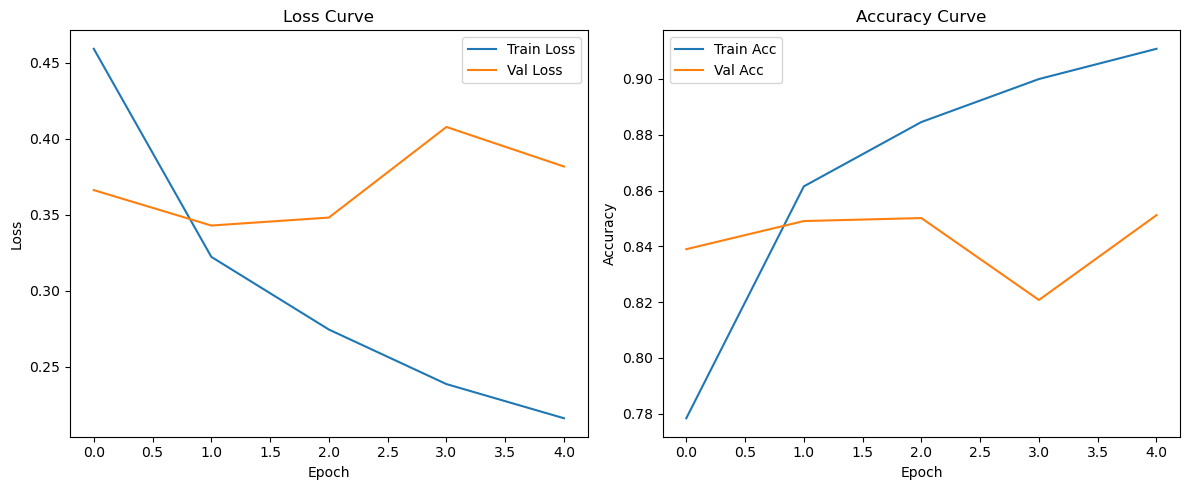

Evaluating: 100%|██████████| 1524/1524 [00:03<00:00, 405.19it/s]

Test Loss: 0.3834, Test Accuracy: 0.8514


In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import sentencepiece as spm
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# --- 1. 데이터 불러오기 및 전처리 ---
train_path = "~/work/going_deeper/2/ratings_train.txt"
test_path  = "~/work/going_deeper/2/ratings_test.txt"

# Pandas를 사용하여 훈련 및 테스트 데이터셋을 각각 로드합니다.
# 파일이 탭(\t)으로 구분되어 있고, UTF-8 인코딩을 사용합니다.
train_df = pd.read_csv(train_path, sep="\t", encoding="utf-8")
test_df  = pd.read_csv(test_path, sep="\t", encoding="utf-8")

def clean_text(text):
    if pd.isnull(text):
        return ""
    # 1. 한글, 숫자, 기본 문장부호만 남김
    text = re.sub(r"[^가-힣0-9\s.,!?]", " ", text)
    # 2. 반복 문자 축소 (ㅋㅋㅋㅋ → ㅋㅋ, ㅎㅎㅎ → ㅎㅎ)
    text = re.sub(r"(ㅋ)\1+", "ㅋㅋ", text)
    text = re.sub(r"(ㅎ)\1+", "ㅎㅎ", text)
    # 3. 공백 정리
    text = re.sub(r"\s+", " ", text).strip()
    return text

# 적용
train_df["document"] = train_df["document"].astype(str).apply(clean_text)
test_df["document"]  = test_df["document"].astype(str).apply(clean_text)

train_df = train_df.drop(columns=["id"])
test_df = test_df.drop(columns=["id"])

train_df = train_df.dropna()
test_df = test_df.dropna()

train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()
                           
# 토크나이저(Tokenizer) 학습을 위해 훈련과 테스트 데이터를 모두 합칩니다.
# 'ignore_index=True'를 설정하여 합쳐진 데이터프레임의 인덱스를 재설정합니다.
# 토크나이저는 전체 어휘를 학습해야 하므로 모든 텍스트를 사용합니다.
combined_df = pd.concat([train_df, test_df], ignore_index=True)

# Null(결측치) 값이 있는 행을 제거합니다. 텍스트가 없는 리뷰는 분석할 수 없기 때문입니다.
combined_df = combined_df.dropna()

# 중복된 리뷰를 제거합니다. 데이터의 불필요한 편향을 막기 위함입니다.
combined_df = combined_df.drop_duplicates()

print(f"합쳐진 전체 데이터셋 크기: {len(combined_df)}")

# --- 2. SentencePiece 토크나이저 학습 ---
# 'document' 컬럼의 모든 텍스트를 파일로 저장합니다.
# 이 파일을 SentencePiece가 코퍼스로 사용합니다.
combined_df["document"].astype(str).to_csv("spm_corpus.txt", index=False, header=False, encoding="utf-8")

# SentencePiece 모델을 학습시킵니다.
# input: 학습에 사용할 코퍼스 파일 경로
# model_prefix: 생성될 모델 파일(.model)과 어휘 파일(.vocab)의 접두사
# vocab_size: 토큰의 총 개수
# model_type: 'unigram'은 가장 널리 사용되는 서브워드 토큰화 알고리즘 중 하나입니다.
spm.SentencePieceTrainer.Train(
    input="spm_corpus.txt",
    model_prefix="spm_unigram",
    vocab_size=8000,
    model_type="unigram",
    character_coverage=0.9995,
    pad_id=0,
    unk_id=1,
    bos_id=-1,
    eos_id=-1,
    input_sentence_size=1000000,
    shuffle_input_sentence=True,
    normalization_rule_name="nmt_nfkc"
)

# 학습이 완료된 SentencePiece 모델을 로드합니다.
sp = spm.SentencePieceProcessor()
sp.load("spm_unigram.model")

# --- 3. 데이터 분할 및 데이터셋 클래스 정의 ---
# 모델 학습을 위해 훈련 데이터를 학습/검증 데이터셋으로 나눕니다.
# 'stratify'를 사용하여 'label'의 비율을 유지하며 분할합니다.
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df["label"])

print(f"모델 학습용 데이터셋 크기: {len(train_df)}")
print(f"모델 검증용 데이터셋 크기: {len(val_df)}")
print(f"모델 테스트용 데이터셋 크기: {len(test_df)}")

# PAD_ID와 최대 시퀀스 길이를 정의합니다.
PAD_ID = sp.pad_id()
MAX_LEN = 96

class NSMCDataset(Dataset):
    """
    PyTorch 모델에 사용할 데이터셋 클래스입니다.
    이 클래스에서는 텍스트를 토큰화만 하고, 패딩은 DataLoader의 collate_fn에서 처리합니다.
    """
    def __init__(self, df):
        self.texts = df["document"].astype(str).tolist()
        self.labels = df["label"].astype(int).tolist()

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        # 문장을 정수 ID로 인코딩합니다. 패딩은 하지 않습니다.
        ids = sp.encode(self.texts[idx], out_type=int)
        return {
            "input_ids": torch.tensor(ids, dtype=torch.long),
            "labels": torch.tensor(self.labels[idx], dtype=torch.long),
        }

def collate_fn(batch, max_len=96):
    """
    DataLoader가 배치 단위로 데이터를 묶을 때 사용되는 함수입니다.
    각 배치의 모든 시퀀스를 동일한 길이로 패딩합니다.
    """
    # 1) 배치 내의 input_ids와 labels를 분리하여 리스트에 모읍니다.
    # 각 시퀀스는 max_len 기준으로 잘라냅니다.
    input_ids = [item["input_ids"][:max_len] for item in batch]
    labels = [item["labels"] for item in batch]

    # 2) pad_sequence를 사용하여 시퀀스를 배치 내에서 가장 긴 시퀀스 길이에 맞춰 패딩합니다.
    # batch_first=True로 설정하여 [batch_size, sequence_length] 형태가 되게 합니다.
    input_ids = pad_sequence(input_ids, batch_first=True, padding_value=PAD_ID)

    # 3) 만약 패딩된 길이가 MAX_LEN보다 길면 (이는 거의 발생하지 않지만, 예외 처리) 강제로 잘라냅니다.
    if input_ids.size(1) > max_len:
        input_ids = input_ids[:, :max_len]

    # 4) labels는 스택하여 하나의 텐서로 만듭니다.
    labels = torch.stack(labels)

    return {
        "input_ids": input_ids,
        "labels": labels,
    }


# DataLoader를 설정하여 데이터를 배치 단위로 효율적으로 로드합니다.
# 'collate_fn' 매개변수에 위에서 정의한 함수를 전달합니다.
train_loader = DataLoader(NSMCDataset(train_df), batch_size=32, shuffle=True, collate_fn=collate_fn)
val_loader   = DataLoader(NSMCDataset(val_df), batch_size=32, shuffle=False, collate_fn=collate_fn)
test_loader  = DataLoader(NSMCDataset(test_df), batch_size=32, shuffle=False, collate_fn=collate_fn)

# --- 4. BiLSTM 모델 정의 ---
class BiLSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim=256, hidden_dim=128, num_classes=2, pad_idx=0):
        super(BiLSTMClassifier, self).__init__()
        # 임베딩 레이어: 토큰 ID를 벡터로 변환
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=pad_idx)
        # 양방향 LSTM 레이어: 시퀀스 데이터의 특징을 양방향으로 학습
        # 'bidirectional=True'로 설정하여 양방향으로 만듭니다.
        self.lstm = nn.LSTM(embed_dim, hidden_dim, num_layers=1, batch_first=True, bidirectional=True)
        # 최종 분류를 위한 선형 레이어: LSTM의 출력을 클래스 개수로 변환
        # 양방향이므로 hidden_dim * 2가 입력 차원이 됩니다.
        self.fc = nn.Linear(hidden_dim * 2, num_classes)
        # 드롭아웃 레이어: 과적합 방지
        self.dropout = nn.Dropout(0.5)

    def forward(self, input_ids):
        # 임베딩 레이어 통과
        embedded = self.embedding(input_ids)
        # LSTM 레이어 통과
        lstm_out, (h_n, c_n) = self.lstm(embedded)
        # 양방향 LSTM의 마지막 hidden state를 합칩니다.
        # h_n[-2,:,:]는 forward 방향, h_n[-1,:,:]는 backward 방향의 마지막 hidden state입니다.
        hidden = torch.cat((h_n[-2, :, :], h_n[-1, :, :]), dim=1)
        # 드롭아웃을 적용하고 최종 분류 레이어를 통과시켜 로짓(logits)을 반환
        out = self.dropout(hidden)
        logits = self.fc(out)
        return logits

# 모델, 손실 함수, 최적화 함수 초기화
VOCAB_SIZE = sp.get_piece_size()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BiLSTMClassifier(vocab_size=VOCAB_SIZE).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# --- 5. 학습 및 평가 함수 정의 ---
def train_epoch(model, dataloader, criterion, optimizer, device):
    """한 에포크 동안 모델을 학습하는 함수"""
    model.train() # 모델을 학습 모드로 설정
    total_loss, total_correct = 0, 0
    for batch in tqdm(dataloader, desc="Training"):
        input_ids = batch["input_ids"].to(device)
        labels = batch["labels"].to(device)

        optimizer.zero_grad() # 그래디언트 초기화
        outputs = model(input_ids)
        loss = criterion(outputs, labels) # 손실 계산
        loss.backward() # 역전파
        optimizer.step() # 매개변수 업데이트

        total_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        total_correct += (preds == labels).sum().item()
    return total_loss / len(dataloader), total_correct / len(dataloader.dataset)

def eval_epoch(model, dataloader, criterion, device):
    """한 에포크 동안 모델을 평가하는 함수"""
    model.eval() # 모델을 평가 모드로 설정
    total_loss, total_correct = 0, 0
    with torch.no_grad(): # 평가 시에는 그래디언트 계산을 비활성화
        for batch in tqdm(dataloader, desc="Evaluating"):
            input_ids = batch["input_ids"].to(device)
            labels = batch["labels"].to(device)
            outputs = model(input_ids)
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            total_correct += (preds == labels).sum().item()
    return total_loss / len(dataloader), total_correct / len(dataloader.dataset)

# --- 6. 모델 학습 및 결과 시각화 ---
train_losses, val_losses = [], []
train_accs, val_accs = [], []

num_epochs = 5
for epoch in range(num_epochs):
    # 학습 및 검증 함수 호출
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc = eval_epoch(model, val_loader, criterion, device)

    # 손실 및 정확도 기록
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"[Epoch {epoch+1}/{num_epochs}] Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}")

# 학습된 모델 저장
torch.save(model.state_dict(), "bilstm_sentpiece.pth")

# 학습 곡선 시각화
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")

plt.subplot(1,2,2)
plt.plot(train_accs, label="Train Acc")
plt.plot(val_accs, label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")

plt.tight_layout()
plt.show()

# --- 7. 최종 모델 평가 ---
# 저장된 모델을 로드하여 테스트 데이터셋으로 성능 평가
model.load_state_dict(torch.load("bilstm_sentpiece.pth"))
test_loss, test_acc = eval_epoch(model, test_loader, criterion, device)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

#### Sentencepiece Tokenizer (bpe)

합쳐진 전체 데이터셋 크기: 192668


sentencepiece_trainer.cc(78) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_corpus.txt
  input_format: 
  model_prefix: spm_bpe
  model_type: BPE
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 1000000
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  seed_sentencepieces_file: 
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 1
  bos_id: -1
  eos_id: -1
  pad_id: 0
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
  enable_differential_privacy: 0
  d

모델 학습용 데이터셋 크기: 115854
모델 검증용 데이터셋 크기: 28964
모델 테스트용 데이터셋 크기: 48740


Evaluating: 100%|██████████| 906/906 [00:02<00:00, 377.42it/s]


[Epoch 1/5] Train Loss: 0.4529, Acc: 0.7826 | Val Loss: 0.3666, Acc: 0.8362


Evaluating: 100%|██████████| 906/906 [00:02<00:00, 380.32it/s]


[Epoch 2/5] Train Loss: 0.3189, Acc: 0.8635 | Val Loss: 0.3449, Acc: 0.8492


Evaluating: 100%|██████████| 906/906 [00:02<00:00, 376.01it/s]


[Epoch 3/5] Train Loss: 0.2655, Acc: 0.8884 | Val Loss: 0.3471, Acc: 0.8502


Evaluating: 100%|██████████| 906/906 [00:02<00:00, 373.80it/s]


[Epoch 4/5] Train Loss: 0.2196, Acc: 0.9098 | Val Loss: 0.3697, Acc: 0.8519


Evaluating: 100%|██████████| 906/906 [00:02<00:00, 370.92it/s]


[Epoch 5/5] Train Loss: 0.1779, Acc: 0.9283 | Val Loss: 0.4096, Acc: 0.8526


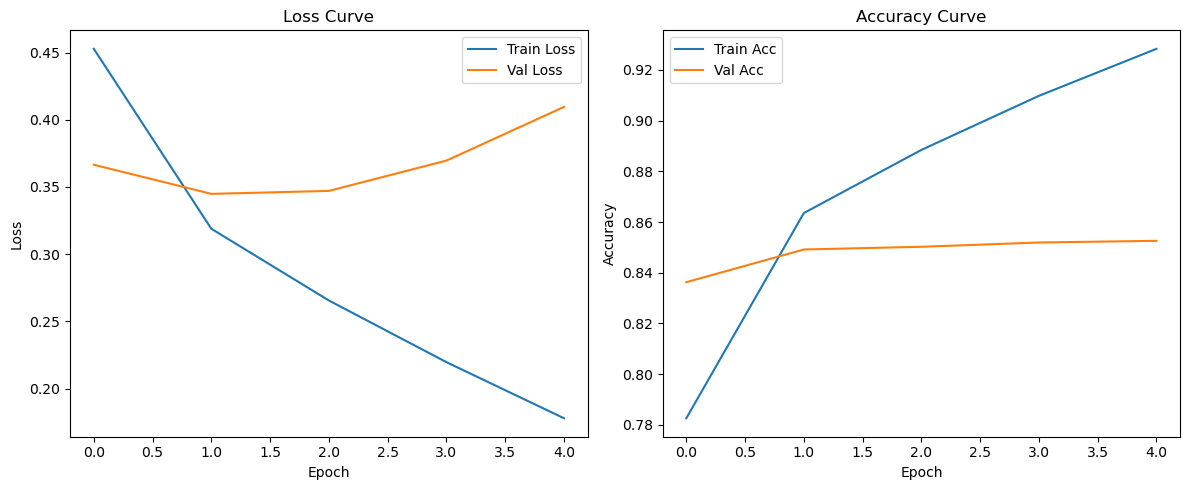

Evaluating: 100%|██████████| 1524/1524 [00:04<00:00, 336.46it/s]

Test Loss: 0.4125, Test Accuracy: 0.8497


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sentencepiece as spm
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# --- 1. 데이터 불러오기 및 전처리 ---
train_path = "~/work/going_deeper/2/ratings_train.txt"
test_path  = "~/work/going_deeper/2/ratings_test.txt"

# Pandas를 사용하여 훈련 및 테스트 데이터셋을 각각 로드합니다.
# 파일이 탭(\t)으로 구분되어 있고, UTF-8 인코딩을 사용합니다.
train_df = pd.read_csv(train_path, sep="\t", encoding="utf-8")
test_df  = pd.read_csv(test_path, sep="\t", encoding="utf-8")

def clean_text(text):
    if pd.isnull(text):
        return ""
    # 1. 한글, 숫자, 기본 문장부호만 남김
    text = re.sub(r"[^가-힣0-9\s.,!?]", " ", text)
    # 2. 반복 문자 축소 (ㅋㅋㅋㅋ → ㅋㅋ, ㅎㅎㅎ → ㅎㅎ)
    text = re.sub(r"(ㅋ)\1+", "ㅋㅋ", text)
    text = re.sub(r"(ㅎ)\1+", "ㅎㅎ", text)
    # 3. 공백 정리
    text = re.sub(r"\s+", " ", text).strip()
    return text

# 적용
train_df["document"] = train_df["document"].astype(str).apply(clean_text)
test_df["document"]  = test_df["document"].astype(str).apply(clean_text)

train_df = train_df.drop(columns=["id"])
test_df = test_df.drop(columns=["id"])

train_df = train_df.dropna()
test_df = test_df.dropna()

train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()

# 토크나이저(Tokenizer) 학습을 위해 훈련과 테스트 데이터를 모두 합칩니다.
# 'ignore_index=True'를 설정하여 합쳐진 데이터프레임의 인덱스를 재설정합니다.
# 토크나이저는 전체 어휘를 학습해야 하므로 모든 텍스트를 사용합니다.
combined_df = pd.concat([train_df, test_df], ignore_index=True)

# Null(결측치) 값이 있는 행을 제거합니다. 텍스트가 없는 리뷰는 분석할 수 없기 때문입니다.
combined_df = combined_df.dropna()

# 중복된 리뷰를 제거합니다. 데이터의 불필요한 편향을 막기 위함입니다.
combined_df = combined_df.drop_duplicates()

print(f"합쳐진 전체 데이터셋 크기: {len(combined_df)}")

# --- 2. SentencePiece 토크나이저 학습 ---
# 'document' 컬럼의 모든 텍스트를 파일로 저장합니다.
# 이 파일을 SentencePiece가 코퍼스로 사용합니다.
combined_df["document"].astype(str).to_csv("spm_corpus.txt", index=False, header=False, encoding="utf-8")

# SentencePiece 모델을 학습시킵니다.
# input: 학습에 사용할 코퍼스 파일 경로
# model_prefix: 생성될 모델 파일(.model)과 어휘 파일(.vocab)의 접두사
# vocab_size: 토큰의 총 개수
# model_type: 'bpe'은 가장 널리 사용되는 서브워드 토큰화 알고리즘 중 하나입니다.
spm.SentencePieceTrainer.Train(
    input="spm_corpus.txt",
    model_prefix="spm_bpe",
    vocab_size=8000,
    model_type="bpe",
    character_coverage=0.9995,
    pad_id=0,
    unk_id=1,
    bos_id=-1,
    eos_id=-1,
    input_sentence_size=1000000,
    shuffle_input_sentence=True,
    normalization_rule_name="nmt_nfkc"
)

# 학습이 완료된 SentencePiece 모델을 로드합니다.
sp = spm.SentencePieceProcessor()
sp.load("spm_bpe.model")

# --- 3. 데이터 분할 및 데이터셋 클래스 정의 ---
# 모델 학습을 위해 훈련 데이터를 학습/검증 데이터셋으로 나눕니다.
# 'stratify'를 사용하여 'label'의 비율을 유지하며 분할합니다.
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df["label"])

print(f"모델 학습용 데이터셋 크기: {len(train_df)}")
print(f"모델 검증용 데이터셋 크기: {len(val_df)}")
print(f"모델 테스트용 데이터셋 크기: {len(test_df)}")

# PAD_ID와 최대 시퀀스 길이를 정의합니다.
PAD_ID = sp.pad_id()
MAX_LEN = 96

class NSMCDataset(Dataset):
    """
    PyTorch 모델에 사용할 데이터셋 클래스입니다.
    이 클래스에서는 텍스트를 토큰화만 하고, 패딩은 DataLoader의 collate_fn에서 처리합니다.
    """
    def __init__(self, df):
        self.texts = df["document"].astype(str).tolist()
        self.labels = df["label"].astype(int).tolist()

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        # 문장을 정수 ID로 인코딩합니다. 패딩은 하지 않습니다.
        ids = sp.encode(self.texts[idx], out_type=int)
        return {
            "input_ids": torch.tensor(ids, dtype=torch.long),
            "labels": torch.tensor(self.labels[idx], dtype=torch.long),
        }

def collate_fn(batch, max_len=96):
    """
    DataLoader가 배치 단위로 데이터를 묶을 때 사용되는 함수입니다.
    각 배치의 모든 시퀀스를 동일한 길이로 패딩합니다.
    """
    # 1) 배치 내의 input_ids와 labels를 분리하여 리스트에 모읍니다.
    # 각 시퀀스는 max_len 기준으로 잘라냅니다.
    input_ids = [item["input_ids"][:max_len] for item in batch]
    labels = [item["labels"] for item in batch]

    # 2) pad_sequence를 사용하여 시퀀스를 배치 내에서 가장 긴 시퀀스 길이에 맞춰 패딩합니다.
    # batch_first=True로 설정하여 [batch_size, sequence_length] 형태가 되게 합니다.
    input_ids = pad_sequence(input_ids, batch_first=True, padding_value=PAD_ID)

    # 3) 만약 패딩된 길이가 MAX_LEN보다 길면 (이는 거의 발생하지 않지만, 예외 처리) 강제로 잘라냅니다.
    if input_ids.size(1) > max_len:
        input_ids = input_ids[:, :max_len]

    # 4) labels는 스택하여 하나의 텐서로 만듭니다.
    labels = torch.stack(labels)

    return {
        "input_ids": input_ids,
        "labels": labels,
    }


# DataLoader를 설정하여 데이터를 배치 단위로 효율적으로 로드합니다.
# 'collate_fn' 매개변수에 위에서 정의한 함수를 전달합니다.
train_loader = DataLoader(NSMCDataset(train_df), batch_size=32, shuffle=True, collate_fn=collate_fn)
val_loader   = DataLoader(NSMCDataset(val_df), batch_size=32, shuffle=False, collate_fn=collate_fn)
test_loader  = DataLoader(NSMCDataset(test_df), batch_size=32, shuffle=False, collate_fn=collate_fn)

# --- 4. BiLSTM 모델 정의 ---
class BiLSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim=256, hidden_dim=128, num_classes=2, pad_idx=0):
        super(BiLSTMClassifier, self).__init__()
        # 임베딩 레이어: 토큰 ID를 벡터로 변환
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=pad_idx)
        # 양방향 LSTM 레이어: 시퀀스 데이터의 특징을 양방향으로 학습
        # 'bidirectional=True'로 설정하여 양방향으로 만듭니다.
        self.lstm = nn.LSTM(embed_dim, hidden_dim, num_layers=1, batch_first=True, bidirectional=True)
        # 최종 분류를 위한 선형 레이어: LSTM의 출력을 클래스 개수로 변환
        # 양방향이므로 hidden_dim * 2가 입력 차원이 됩니다.
        self.fc = nn.Linear(hidden_dim * 2, num_classes)
        # 드롭아웃 레이어: 과적합 방지
        self.dropout = nn.Dropout(0.5)

    def forward(self, input_ids):
        # 임베딩 레이어 통과
        embedded = self.embedding(input_ids)
        # LSTM 레이어 통과
        lstm_out, (h_n, c_n) = self.lstm(embedded)
        # 양방향 LSTM의 마지막 hidden state를 합칩니다.
        # h_n[-2,:,:]는 forward 방향, h_n[-1,:,:]는 backward 방향의 마지막 hidden state입니다.
        hidden = torch.cat((h_n[-2, :, :], h_n[-1, :, :]), dim=1)
        # 드롭아웃을 적용하고 최종 분류 레이어를 통과시켜 로짓(logits)을 반환
        out = self.dropout(hidden)
        logits = self.fc(out)
        return logits

# 모델, 손실 함수, 최적화 함수 초기화
VOCAB_SIZE = sp.get_piece_size()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BiLSTMClassifier(vocab_size=VOCAB_SIZE).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# --- 5. 학습 및 평가 함수 정의 ---
def train_epoch(model, dataloader, criterion, optimizer, device):
    """한 에포크 동안 모델을 학습하는 함수"""
    model.train() # 모델을 학습 모드로 설정
    total_loss, total_correct = 0, 0
    for batch in tqdm(dataloader, desc="Training"):
        input_ids = batch["input_ids"].to(device)
        labels = batch["labels"].to(device)

        optimizer.zero_grad() # 그래디언트 초기화
        outputs = model(input_ids)
        loss = criterion(outputs, labels) # 손실 계산
        loss.backward() # 역전파
        optimizer.step() # 매개변수 업데이트

        total_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        total_correct += (preds == labels).sum().item()
    return total_loss / len(dataloader), total_correct / len(dataloader.dataset)

def eval_epoch(model, dataloader, criterion, device):
    """한 에포크 동안 모델을 평가하는 함수"""
    model.eval() # 모델을 평가 모드로 설정
    total_loss, total_correct = 0, 0
    with torch.no_grad(): # 평가 시에는 그래디언트 계산을 비활성화
        for batch in tqdm(dataloader, desc="Evaluating"):
            input_ids = batch["input_ids"].to(device)
            labels = batch["labels"].to(device)
            outputs = model(input_ids)
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            total_correct += (preds == labels).sum().item()
    return total_loss / len(dataloader), total_correct / len(dataloader.dataset)

# --- 6. 모델 학습 및 결과 시각화 ---
train_losses, val_losses = [], []
train_accs, val_accs = [], []

num_epochs = 5
for epoch in range(num_epochs):
    # 학습 및 검증 함수 호출
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc = eval_epoch(model, val_loader, criterion, device)

    # 손실 및 정확도 기록
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"[Epoch {epoch+1}/{num_epochs}] Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}")

# 학습된 모델 저장
torch.save(model.state_dict(), "bilstm_sentpiece_bpe.pth")

# 학습 곡선 시각화
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")

plt.subplot(1,2,2)
plt.plot(train_accs, label="Train Acc")
plt.plot(val_accs, label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")

plt.tight_layout()
plt.show()

# --- 7. 최종 모델 평가 ---
# 저장된 모델을 로드하여 테스트 데이터셋으로 성능 평가
model.load_state_dict(torch.load("bilstm_sentpiece_bpe.pth"))
test_loss, test_acc = eval_epoch(model, test_loader, criterion, device)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

#### Mecab Tokenizer

전처리 후 학습 데이터셋 크기: 144818
전처리 후 테스트 데이터셋 크기: 48740
구축된 어휘 집합 크기: 18234
모델 학습용 데이터셋 크기: 115854
모델 검증용 데이터셋 크기: 28964
모델 테스트용 데이터셋 크기: 48740


Evaluating: 100%|██████████| 906/906 [00:04<00:00, 207.14it/s]


[Epoch 1/5] Train Loss: 0.4078, Acc: 0.8132 | Val Loss: 0.3405, Acc: 0.8500


Evaluating: 100%|██████████| 906/906 [00:04<00:00, 207.84it/s]


[Epoch 2/5] Train Loss: 0.2942, Acc: 0.8769 | Val Loss: 0.3186, Acc: 0.8619


Evaluating: 100%|██████████| 906/906 [00:04<00:00, 209.97it/s]


[Epoch 3/5] Train Loss: 0.2386, Acc: 0.9034 | Val Loss: 0.3186, Acc: 0.8661


Evaluating: 100%|██████████| 906/906 [00:04<00:00, 213.85it/s]


[Epoch 4/5] Train Loss: 0.1940, Acc: 0.9235 | Val Loss: 0.3454, Acc: 0.8653


Evaluating: 100%|██████████| 906/906 [00:04<00:00, 210.36it/s]


[Epoch 5/5] Train Loss: 0.1569, Acc: 0.9402 | Val Loss: 0.3804, Acc: 0.8632


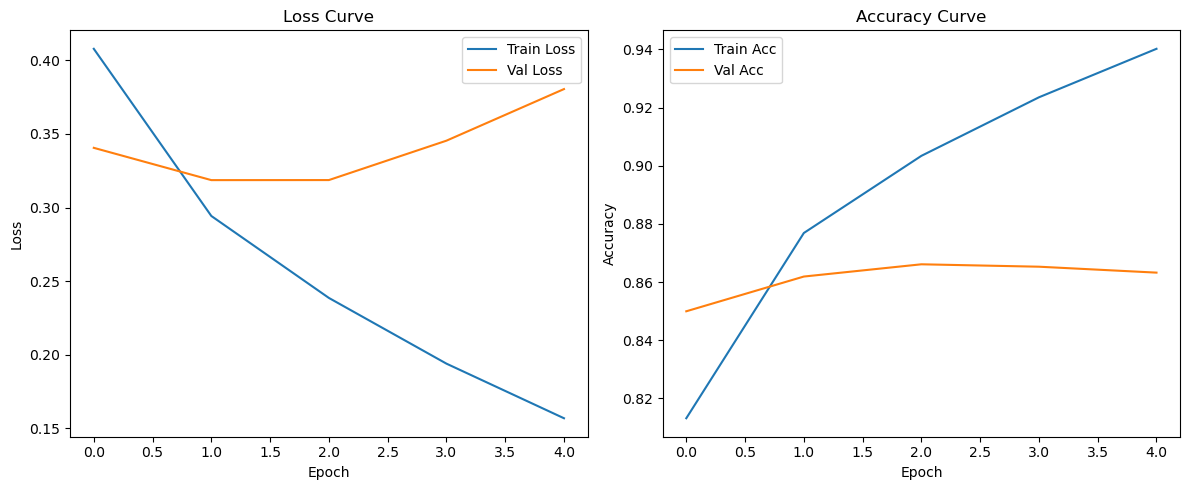

Evaluating: 100%|██████████| 1524/1524 [00:08<00:00, 180.82it/s]

Test Loss: 0.3827, Test Accuracy: 0.8653


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from collections import Counter
from konlpy.tag import Mecab

# --- 1. 데이터 불러오기 및 전처리 (Data Loading and Preprocessing) ---
# 데이터 파일 경로를 변수에 저장합니다.
train_path = "~/work/going_deeper/2/ratings_train.txt"
test_path  = "~/work/going_deeper/2/ratings_test.txt"

# Pandas 라이브러리를 사용해 훈련 및 테스트 데이터셋을 각각 로드합니다.
# 'sep="\t"'는 파일의 열이 탭으로 구분되어 있음을 나타냅니다.
# 'encoding="utf-8"'은 한글 텍스트를 올바르게 처리하기 위함입니다.
train_df = pd.read_csv(train_path, sep="\t", encoding="utf-8")
test_df  = pd.read_csv(test_path, sep="\t", encoding="utf-8")

def clean_text(text):
    if pd.isnull(text):
        return ""
    # 1. 한글, 숫자, 기본 문장부호만 남김
    text = re.sub(r"[^가-힣0-9\s.,!?]", " ", text)
    # 2. 반복 문자 축소 (ㅋㅋㅋㅋ → ㅋㅋ, ㅎㅎㅎ → ㅎㅎ)
    text = re.sub(r"(ㅋ)\1+", "ㅋㅋ", text)
    text = re.sub(r"(ㅎ)\1+", "ㅎㅎ", text)
    # 3. 공백 정리
    text = re.sub(r"\s+", " ", text).strip()
    return text

# 적용
train_df["document"] = train_df["document"].astype(str).apply(clean_text)
test_df["document"]  = test_df["document"].astype(str).apply(clean_text)

train_df = train_df.drop(columns=["id"])
test_df = test_df.drop(columns=["id"])

train_df = train_df.dropna()
test_df = test_df.dropna()

train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()

print(f"전처리 후 학습 데이터셋 크기: {len(train_df)}")
print(f"전처리 후 테스트 데이터셋 크기: {len(test_df)}")

# --- 2. MeCab 형태소 분석기 및 어휘 집합(Vocab) 구축 (Mecab Tokenizer & Vocab Building) ---
# KoNLPy의 Mecab 형태소 분석기 인스턴스를 생성합니다.
mecab = Mecab()

# 한국어 자연어 처리에서 불필요한 단어들을 정의합니다. 이 단어들은 분석에서 제외됩니다.
stopwords = ['이', '그', '저', '것', '수', '때', '등', '들', '좀', '막', '약간', '참']

def tokenize_with_mecab(text):
    """
    MeCab을 사용해 텍스트를 형태소로 분리하고 불용어를 제거하는 함수.
    문자열이 아닌 입력에 대한 예외 처리를 추가했습니다.
    """
    if not isinstance(text, str):
        return []
    # mecab.morphs(text)는 텍스트를 형태소 단위로 분리하여 리스트로 반환합니다.
    tokens = mecab.morphs(text)
    # 리스트 내포(list comprehension)를 사용해 불용어를 제거합니다.
    filtered_tokens = [token for token in tokens if token not in stopwords]
    return filtered_tokens

# 모델 학습에 사용할 전체 어휘 집합을 구축하기 위해 훈련 및 테스트 데이터의 'document' 컬럼을 하나로 합칩니다.
combined_texts = pd.concat([train_df['document'], test_df['document']], ignore_index=True)

# 'apply' 메서드를 사용하여 모든 텍스트에 대해 형태소 분석을 수행합니다.
tokenized_texts = combined_texts.apply(tokenize_with_mecab).tolist()

# 모든 토큰들을 하나의 리스트로 만든 후, Counter를 사용해 각 토큰의 빈도수를 셉니다.
all_tokens = [token for sublist in tokenized_texts for token in sublist]
token_counts = Counter(all_tokens)

# 빈도수가 5 이상인 토큰만 어휘 집합에 포함시킵니다.
# 이는 모델의 크기를 줄이고 희귀 단어로 인한 문제를 방지하는 효과가 있습니다.
min_freq = 5
vocab_list = [token for token, count in token_counts.items() if count >= min_freq]

# 특수 토큰인 '<pad>' (패딩), '<unk>' (알 수 없는 토큰)을 어휘 집합 맨 앞에 추가합니다.
special_tokens = ['<pad>', '<unk>']
# 딕셔너리를 사용하여 토큰을 정수 ID로 매핑합니다.
vocab = {token: i for i, token in enumerate(special_tokens + vocab_list)}
PAD_ID = vocab['<pad>']
UNK_ID = vocab['<unk>']
VOCAB_SIZE = len(vocab)
print(f"구축된 어휘 집합 크기: {VOCAB_SIZE}")

def encode_with_vocab(text, vocab):
    """텍스트를 형태소 분석 후, 어휘 집합을 기반으로 토큰 ID 시퀀스로 변환하는 함수"""
    # 텍스트를 형태소로 분리합니다.
    tokens = tokenize_with_mecab(text)
    # 각 토큰을 딕셔너리에서 찾아 ID로 변환합니다. 만약 없는 토큰이면 UNK_ID를 사용합니다.
    ids = [vocab.get(token, UNK_ID) for token in tokens]
    return ids

# --- 3. 데이터 분할 및 DataLoader 클래스 정의 (Data Splitting & DataLoader) ---
# 모델 학습을 위해 훈련 데이터를 학습(train)과 검증(validation) 데이터셋으로 나눕니다.
# 'stratify=train_df["label"]'을 통해 두 데이터셋의 'label' 비율이 동일하게 유지되도록 합니다.
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df["label"])

print(f"모델 학습용 데이터셋 크기: {len(train_df)}")
print(f"모델 검증용 데이터셋 크기: {len(val_df)}")
print(f"모델 테스트용 데이터셋 크기: {len(test_df)}")

MAX_LEN = 96

class NSMCDataset(Dataset):
    """
    PyTorch 모델에 사용할 데이터셋 클래스.
    __getitem__ 메서드에서 텍스트를 ID 시퀀스로 변환하지만, 패딩은 하지 않습니다.
    """
    def __init__(self, df, vocab):
        self.texts = df["document"].astype(str).tolist()
        self.labels = df["label"].astype(int).tolist()
        self.vocab = vocab

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        # 텍스트를 어휘집 기반으로 ID 시퀀스로 변환합니다.
        ids = encode_with_vocab(self.texts[idx], self.vocab)
        return {
            "input_ids": torch.tensor(ids, dtype=torch.long),
            "labels": torch.tensor(self.labels[idx], dtype=torch.long),
        }

def collate_fn(batch, max_len=MAX_LEN):
    """
    DataLoader가 배치 단위로 데이터를 묶을 때 사용되는 함수.
    각 배치의 모든 시퀀스를 동일한 길이로 패딩합니다.
    """
    # 1) 배치 내의 input_ids와 labels를 분리하여 리스트에 모읍니다.
    # 각 시퀀스는 max_len 기준으로 잘라냅니다.
    input_ids = [item["input_ids"][:max_len] for item in batch]
    labels = [item["labels"] for item in batch]

    # 2) pad_sequence를 사용하여 시퀀스를 배치 내에서 가장 긴 시퀀스 길이에 맞춰 패딩합니다.
    # 'batch_first=True'로 설정하여 [batch_size, sequence_length] 형태가 되게 합니다.
    input_ids = pad_sequence(input_ids, batch_first=True, padding_value=PAD_ID)

    # 3) 만약 패딩된 길이가 MAX_LEN보다 길면 강제로 잘라냅니다.
    if input_ids.size(1) > max_len:
        input_ids = input_ids[:, :max_len]

    # 4) labels는 스택하여 하나의 텐서로 만듭니다.
    labels = torch.stack(labels)

    return {
        "input_ids": input_ids,
        "labels": labels,
    }


# DataLoader를 설정하여 데이터를 배치 단위로 효율적으로 로드합니다.
# 'collate_fn' 매개변수에 위에서 정의한 함수를 전달합니다.
train_loader = DataLoader(NSMCDataset(train_df, vocab), batch_size=32, shuffle=True, collate_fn=collate_fn)
val_loader   = DataLoader(NSMCDataset(val_df, vocab), batch_size=32, shuffle=False, collate_fn=collate_fn)
test_loader  = DataLoader(NSMCDataset(test_df, vocab), batch_size=32, shuffle=False, collate_fn=collate_fn)

# --- 4. BiLSTM 모델 정의 및 초기화 (BiLSTM Model Definition) ---
class BiLSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim=256, hidden_dim=128, num_classes=2, pad_idx=0):
        super(BiLSTMClassifier, self).__init__()
        # 임베딩 레이어: 토큰 ID를 고정된 길이의 벡터로 변환합니다.
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=pad_idx)
        # 양방향 LSTM 레이어: 시퀀스 데이터의 특징을 순방향과 역방향으로 모두 학습합니다.
        # 'bidirectional=True'로 설정하여 양방향으로 만듭니다.
        self.lstm = nn.LSTM(embed_dim, hidden_dim, num_layers=1, batch_first=True, bidirectional=True)
        # 최종 분류를 위한 선형 레이어: LSTM의 출력을 긍/부정 클래스 개수(2개)로 변환합니다.
        # 양방향이므로 hidden_dim의 2배가 입력 차원이 됩니다.
        self.fc = nn.Linear(hidden_dim * 2, num_classes)
        # 드롭아웃 레이어: 학습 시 뉴런의 일부를 무작위로 비활성화하여 과적합을 방지합니다.
        self.dropout = nn.Dropout(0.5)

    def forward(self, input_ids):
        # 입력 ID를 임베딩 레이어에 통과시켜 벡터로 변환합니다.
        embedded = self.embedding(input_ids)
        # 임베딩된 데이터를 LSTM 레이어에 입력합니다. lstm_out은 전체 시퀀스의 출력이고,
        # (h_n, c_n)은 마지막 시점의 hidden state와 cell state입니다.
        lstm_out, (h_n, c_n) = self.lstm(embedded)
        # 양방향 LSTM의 순방향 마지막 hidden state(h_n[-2,:,:])와
        # 역방향 마지막 hidden state(h_n[-1,:,:])를 합칩니다.
        hidden = torch.cat((h_n[-2, :, :], h_n[-1, :, :]), dim=1)
        # 합쳐진 hidden state에 드롭아웃을 적용하고 최종 분류 레이어를 통과시킵니다.
        out = self.dropout(hidden)
        logits = self.fc(out)
        return logits

# 모델, 손실 함수, 최적화 함수를 초기화합니다.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BiLSTMClassifier(vocab_size=VOCAB_SIZE, pad_idx=PAD_ID).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# --- 5. 학습 및 평가 함수 정의 (Training & Evaluation Functions) ---
def train_epoch(model, dataloader, criterion, optimizer, device):
    """한 에포크 동안 모델을 학습하는 함수"""
    model.train() # 모델을 학습 모드로 설정
    total_loss, total_correct = 0, 0
    for batch in tqdm(dataloader, desc="Training"):
        input_ids = batch["input_ids"].to(device)
        labels = batch["labels"].to(device)
        optimizer.zero_grad() # 그래디언트 초기화
        outputs = model(input_ids)
        loss = criterion(outputs, labels) # 손실 계산
        loss.backward() # 역전파
        optimizer.step() # 매개변수 업데이트
        total_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        total_correct += (preds == labels).sum().item()
    return total_loss / len(dataloader), total_correct / len(dataloader.dataset)

def eval_epoch(model, dataloader, criterion, device):
    """한 에포크 동안 모델을 평가하는 함수"""
    model.eval() # 모델을 평가 모드로 설정
    total_loss, total_correct = 0, 0
    with torch.no_grad(): # 평가 시에는 그래디언트 계산을 비활성화
        for batch in tqdm(dataloader, desc="Evaluating"):
            input_ids = batch["input_ids"].to(device)
            labels = batch["labels"].to(device)
            outputs = model(input_ids)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            total_correct += (preds == labels).sum().item()
    return total_loss / len(dataloader), total_correct / len(dataloader.dataset)

# --- 6. 모델 학습 및 결과 시각화 (Model Training & Visualization) ---
train_losses, val_losses = [], []
train_accs, val_accs = [], []

num_epochs = 5
for epoch in range(num_epochs):
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc = eval_epoch(model, val_loader, criterion, device)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)
    print(f"[Epoch {epoch+1}/{num_epochs}] Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}")

# 학습된 모델의 파라미터를 저장합니다.
torch.save(model.state_dict(), "bilstm_mecab.pth")

# 학습 곡선(Loss/Accuracy)을 시각화합니다.
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")
plt.subplot(1,2,2)
plt.plot(train_accs, label="Train Acc")
plt.plot(val_accs, label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")
plt.tight_layout()
plt.show()

# --- 7. 최종 모델 평가 (Final Model Evaluation) ---
# 저장된 모델의 파라미터를 다시 로드합니다.
model.load_state_dict(torch.load("bilstm_mecab.pth"))
# 테스트 데이터셋으로 최종 성능을 평가합니다.
test_loss, test_acc = eval_epoch(model, test_loader, criterion, device)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

#### 추가 실험 

모델 학습용 데이터셋 크기: 106004
모델 검증용 데이터셋 크기: 26502
모델 테스트용 데이터셋 크기: 48740


Evaluating: 100%|██████████| 829/829 [00:01<00:00, 416.77it/s]


[Epoch 1/5] Train Loss: 0.4516, Acc: 0.7815 | Val Loss: 0.3705, Acc: 0.8353


Evaluating: 100%|██████████| 829/829 [00:01<00:00, 439.40it/s]


[Epoch 2/5] Train Loss: 0.3197, Acc: 0.8638 | Val Loss: 0.3527, Acc: 0.8433


Evaluating: 100%|██████████| 829/829 [00:01<00:00, 422.70it/s]


[Epoch 3/5] Train Loss: 0.2641, Acc: 0.8899 | Val Loss: 0.3632, Acc: 0.8459


Evaluating: 100%|██████████| 829/829 [00:01<00:00, 431.39it/s]


[Epoch 4/5] Train Loss: 0.2139, Acc: 0.9118 | Val Loss: 0.3902, Acc: 0.8453


Evaluating: 100%|██████████| 829/829 [00:01<00:00, 418.14it/s]


[Epoch 5/5] Train Loss: 0.1713, Acc: 0.9318 | Val Loss: 0.4372, Acc: 0.8444


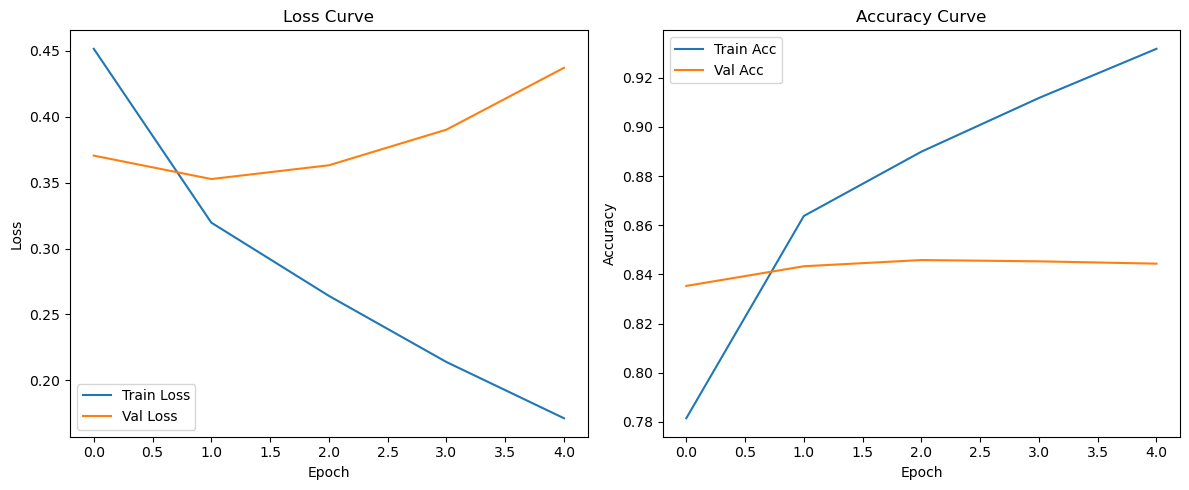

Evaluating: 100%|██████████| 1524/1524 [00:04<00:00, 328.28it/s]

Test Loss: 0.4400, Test Accuracy: 0.8492


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import sentencepiece as spm
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# --- 1. 데이터 불러오기 및 전처리 ---
# 데이터 파일 경로를 변수에 저장합니다.
train_path = "~/work/going_deeper/2/ratings_train.txt"
test_path  = "~/work/going_deeper/2/ratings_test.txt"

# Pandas를 사용하여 훈련 및 테스트 데이터셋을 각각 로드합니다.
# 파일이 탭(\t)으로 구분되어 있고, UTF-8 인코딩을 사용합니다.
train_df = pd.read_csv(train_path, sep="\t", encoding="utf-8")
test_df  = pd.read_csv(test_path, sep="\t", encoding="utf-8")

def clean_text(text):
    if pd.isnull(text):
        return ""
    # 1. 한글, 숫자, 기본 문장부호만 남김
    text = re.sub(r"[^가-힣0-9\s.,!?]", " ", text)
    # 2. 반복 문자 축소 (ㅋㅋㅋㅋ → ㅋㅋ, ㅎㅎㅎ → ㅎㅎ)
    text = re.sub(r"(ㅋ)\1+", "ㅋㅋ", text)
    text = re.sub(r"(ㅎ)\1+", "ㅎㅎ", text)
    # 3. 공백 정리
    text = re.sub(r"\s+", " ", text).strip()
    return text

# 적용
train_df["document"] = train_df["document"].astype(str).apply(clean_text)
test_df["document"]  = test_df["document"].astype(str).apply(clean_text)

train_df = train_df.drop(columns=["id"])
test_df = test_df.drop(columns=["id"])

train_df = train_df.dropna()
test_df = test_df.dropna()

train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()

# 학습이 완료된 SentencePiece 모델을 로드합니다.
# 이 모델은 이미 'spm_bpe.model' 파일로 저장되어 있다고 가정합니다.
sp = spm.SentencePieceProcessor()
sp.load("spm_bpe.model")

# --- 2. 데이터 분할 및 데이터셋 클래스 정의 ---
# 'document' 컬럼의 길이를 계산하여 새로운 'doc_length' 컬럼에 저장합니다.
train_df["doc_length"] = train_df["document"].str.len()
# 리뷰 길이가 83자 미만인 데이터만 필터링합니다. 이는 긴 리뷰로 인한 노이즈를 줄이기 위함입니다.
train_df = train_df[(train_df["doc_length"] < 83)]

# 모델 학습을 위해 훈련 데이터를 학습(train)과 검증(validation) 데이터셋으로 나눕니다.
# 'test_size=0.2'는 전체 데이터의 20%를 검증 데이터로 사용함을 의미합니다.
# 'random_state=42'는 재현 가능성을 위해 무작위성을 고정합니다.
# 'stratify=train_df["label"]'은 두 데이터셋의 'label' (긍정/부정) 비율이 동일하게 유지되도록 합니다.
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df["label"])

# 각 데이터셋의 크기를 출력하여 데이터 분할 결과를 확인합니다.
print(f"모델 학습용 데이터셋 크기: {len(train_df)}")
print(f"모델 검증용 데이터셋 크기: {len(val_df)}")
print(f"모델 테스트용 데이터셋 크기: {len(test_df)}")

# PAD 토큰 ID와 모델이 처리할 최대 시퀀스 길이를 정의합니다.
PAD_ID = sp.pad_id()
MAX_LEN = 96

class NSMCDataset(Dataset):
    """
    PyTorch 모델에 사용할 데이터셋 클래스입니다.
    데이터프레임(df)을 입력받아 텍스트와 라벨을 리스트 형태로 저장합니다.
    """
    def __init__(self, df):
        # 'document' 컬럼의 텍스트를 문자열로 변환하고 리스트로 만듭니다.
        self.texts = df["document"].astype(str).tolist()
        # 'label' 컬럼의 값을 정수로 변환하고 리스트로 만듭니다.
        self.labels = df["label"].astype(int).tolist()

    def __len__(self):
        # 데이터셋의 총 샘플 수를 반환합니다.
        return len(self.texts)

    def __getitem__(self, idx):
        # 주어진 인덱스(idx)에 해당하는 텍스트를 가져와 SentencePiece 모델로 인코딩합니다.
        # 'out_type=int'는 토큰을 정수 ID로 변환하도록 지정합니다.
        ids = sp.encode(self.texts[idx], out_type=int)
        # 반환할 딕셔너리를 구성합니다. input_ids는 토큰 ID 텐서, labels는 라벨 텐서입니다.
        # 이 클래스에서는 패딩을 하지 않고, 원본 길이의 시퀀스를 반환합니다.
        return {
            "input_ids": torch.tensor(ids, dtype=torch.long),
            "labels": torch.tensor(self.labels[idx], dtype=torch.long),
        }

def collate_fn(batch, max_len=96):
    """
    DataLoader가 배치 단위로 데이터를 묶을 때 사용되는 함수입니다.
    다양한 길이의 시퀀스를 배치 내에서 동일한 길이로 패딩합니다.
    """
    # 1) 배치 내의 각 아이템에서 'input_ids'와 'labels'를 분리하여 리스트에 모읍니다.
    # 이 때, 각 시퀀스는 MAX_LEN을 초과하지 않도록 잘라냅니다.
    input_ids = [item["input_ids"][:max_len] for item in batch]
    labels = [item["labels"] for item in batch]

    # 2) pad_sequence를 사용하여 시퀀스를 배치 내에서 가장 긴 시퀀스 길이에 맞춰 패딩합니다.
    # 'batch_first=True'로 설정하여 [batch_size, sequence_length] 형태가 되게 합니다.
    # 'padding_value=PAD_ID'는 빈 공간을 PAD 토큰 ID로 채우도록 지정합니다.
    input_ids = pad_sequence(input_ids, batch_first=True, padding_value=PAD_ID)

    # 3) 만약 패딩된 길이가 MAX_LEN보다 길면 (이는 거의 발생하지 않지만, 예외 처리) 강제로 잘라냅니다.
    if input_ids.size(1) > max_len:
        input_ids = input_ids[:, :max_len]

    # 4) labels는 'stack'을 사용하여 하나의 텐서로 결합합니다.
    labels = torch.stack(labels)

    # 최종 배치 데이터를 딕셔너리 형태로 반환합니다.
    return {
        "input_ids": input_ids,
        "labels": labels,
    }


# DataLoader를 설정하여 데이터를 배치 단위로 효율적으로 로드합니다.
# 'collate_fn' 매개변수에 위에서 정의한 함수를 전달하여 패딩을 처리하도록 합니다.
# 'shuffle=True'는 학습 데이터 로드 시 데이터를 섞어줍니다.
train_loader = DataLoader(NSMCDataset(train_df), batch_size=32, shuffle=True, collate_fn=collate_fn)
val_loader   = DataLoader(NSMCDataset(val_df), batch_size=32, shuffle=False, collate_fn=collate_fn)
test_loader  = DataLoader(NSMCDataset(test_df), batch_size=32, shuffle=False, collate_fn=collate_fn)

# --- 4. BiLSTM 모델 정의 ---
class BiLSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim=256, hidden_dim=128, num_classes=2, pad_idx=0):
        super(BiLSTMClassifier, self).__init__()
        # 임베딩 레이어: 토큰 ID를 고정된 길이의 벡터로 변환합니다.
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=pad_idx)
        # 양방향 LSTM 레이어: 시퀀스 데이터의 특징을 순방향과 역방향으로 모두 학습합니다.
        self.lstm = nn.LSTM(embed_dim, hidden_dim, num_layers=1, batch_first=True, bidirectional=True)
        # 최종 분류를 위한 선형 레이어: LSTM의 출력을 긍/부정 클래스 개수(2개)로 변환합니다.
        self.fc = nn.Linear(hidden_dim * 2, num_classes)
        # 드롭아웃 레이어: 학습 시 뉴런의 일부를 무작위로 비활성화하여 과적합을 방지합니다.
        self.dropout = nn.Dropout(0.5)

    def forward(self, input_ids):
        # 입력 ID를 임베딩 레이어에 통과시켜 벡터로 변환합니다.
        embedded = self.embedding(input_ids)
        # 임베딩된 데이터를 LSTM 레이어에 입력합니다.
        lstm_out, (h_n, c_n) = self.lstm(embedded)
        # 양방향 LSTM의 순방향 마지막 hidden state(h_n[-2,:,:])와
        # 역방향 마지막 hidden state(h_n[-1,:,:])를 합칩니다.
        hidden = torch.cat((h_n[-2, :, :], h_n[-1, :, :]), dim=1)
        # 합쳐진 hidden state에 드롭아웃을 적용하고 최종 분류 레이어를 통과시킵니다.
        out = self.dropout(hidden)
        logits = self.fc(out)
        return logits

# 모델, 손실 함수, 최적화 함수를 초기화합니다.
VOCAB_SIZE = sp.get_piece_size()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BiLSTMClassifier(vocab_size=VOCAB_SIZE).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# --- 5. 학습 및 평가 함수 정의 ---
def train_epoch(model, dataloader, criterion, optimizer, device):
    """한 에포크 동안 모델을 학습하는 함수"""
    model.train() # 모델을 학습 모드로 설정
    total_loss, total_correct = 0, 0
    for batch in tqdm(dataloader, desc="Training"):
        input_ids = batch["input_ids"].to(device)
        labels = batch["labels"].to(device)

        optimizer.zero_grad() # 그래디언트 초기화
        outputs = model(input_ids)
        loss = criterion(outputs, labels) # 손실 계산
        loss.backward() # 역전파
        optimizer.step() # 매개변수 업데이트

        total_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        total_correct += (preds == labels).sum().item()
    return total_loss / len(dataloader), total_correct / len(dataloader.dataset)

def eval_epoch(model, dataloader, criterion, device):
    """한 에포크 동안 모델을 평가하는 함수"""
    model.eval() # 모델을 평가 모드로 설정
    total_loss, total_correct = 0, 0
    with torch.no_grad(): # 평가 시에는 그래디언트 계산을 비활성화
        for batch in tqdm(dataloader, desc="Evaluating"):
            input_ids = batch["input_ids"].to(device)
            labels = batch["labels"].to(device)
            outputs = model(input_ids)
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            total_correct += (preds == labels).sum().item()
    return total_loss / len(dataloader), total_correct / len(dataloader.dataset)

# --- 6. 모델 학습 및 결과 시각화 ---
train_losses, val_losses = [], []
train_accs, val_accs = [], []

num_epochs = 5
for epoch in range(num_epochs):
    # 학습 및 검증 함수 호출
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc = eval_epoch(model, val_loader, criterion, device)

    # 손실 및 정확도 기록
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"[Epoch {epoch+1}/{num_epochs}] Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}")

# 학습된 모델 저장
torch.save(model.state_dict(), "bilstm_sentpiece_bpe_0083.pth")

# 학습 곡선 시각화
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")

plt.subplot(1,2,2)
plt.plot(train_accs, label="Train Acc")
plt.plot(val_accs, label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")

plt.tight_layout()
plt.show()

# --- 7. 최종 모델 평가 ---
# 저장된 모델을 로드하여 테스트 데이터셋으로 성능 평가
model.load_state_dict(torch.load("bilstm_sentpiece_bpe_0083.pth"))
test_loss, test_acc = eval_epoch(model, test_loader, criterion, device)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

모델 학습용 데이터셋 크기: 96665
모델 검증용 데이터셋 크기: 24167
모델 테스트용 데이터셋 크기: 48740


Evaluating: 100%|██████████| 756/756 [00:01<00:00, 417.45it/s]


[Epoch 1/5] Train Loss: 0.4550, Acc: 0.7804 | Val Loss: 0.3707, Acc: 0.8349


Evaluating: 100%|██████████| 756/756 [00:01<00:00, 409.40it/s]


[Epoch 2/5] Train Loss: 0.3185, Acc: 0.8632 | Val Loss: 0.3527, Acc: 0.8417


Evaluating: 100%|██████████| 756/756 [00:01<00:00, 433.17it/s]


[Epoch 3/5] Train Loss: 0.2610, Acc: 0.8903 | Val Loss: 0.3603, Acc: 0.8459


Evaluating: 100%|██████████| 756/756 [00:01<00:00, 424.81it/s]


[Epoch 4/5] Train Loss: 0.2078, Acc: 0.9152 | Val Loss: 0.3883, Acc: 0.8477


Evaluating: 100%|██████████| 756/756 [00:01<00:00, 419.44it/s]


[Epoch 5/5] Train Loss: 0.1627, Acc: 0.9344 | Val Loss: 0.4647, Acc: 0.8432


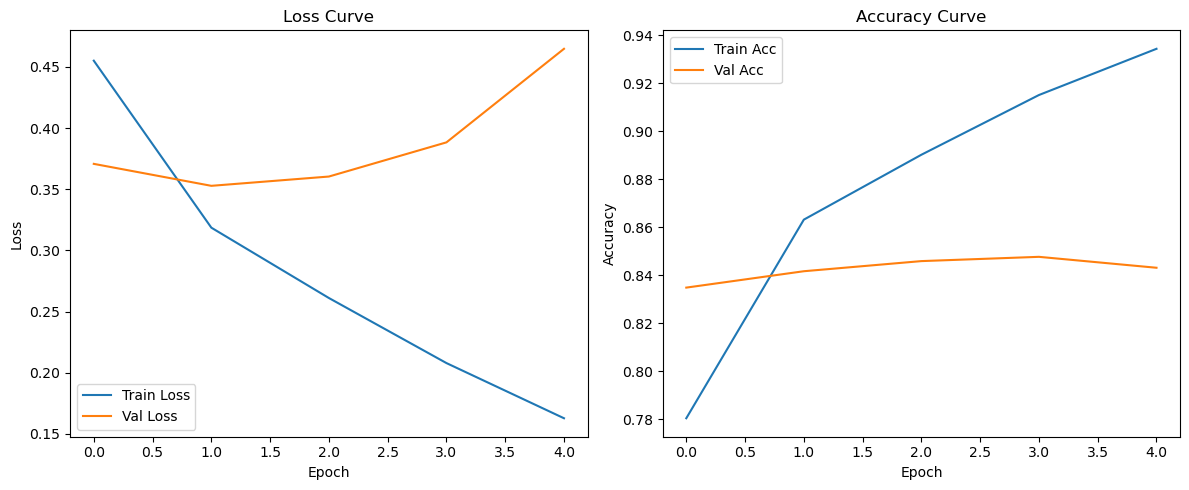

Evaluating: 100%|██████████| 1524/1524 [00:04<00:00, 325.31it/s]

Test Loss: 0.4645, Test Accuracy: 0.8473


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import sentencepiece as spm
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# --- 1. 데이터 불러오기 및 전처리 ---
# 데이터 파일 경로를 변수에 저장합니다.
train_path = "~/work/going_deeper/2/ratings_train.txt"
test_path  = "~/work/going_deeper/2/ratings_test.txt"

# Pandas를 사용하여 훈련 및 테스트 데이터셋을 각각 로드합니다.
# 파일이 탭(\t)으로 구분되어 있고, UTF-8 인코딩을 사용합니다.
train_df = pd.read_csv(train_path, sep="\t", encoding="utf-8")
test_df  = pd.read_csv(test_path, sep="\t", encoding="utf-8")

def clean_text(text):
    if pd.isnull(text):
        return ""
    # 1. 한글, 숫자, 기본 문장부호만 남김
    text = re.sub(r"[^가-힣0-9\s.,!?]", " ", text)
    # 2. 반복 문자 축소 (ㅋㅋㅋㅋ → ㅋㅋ, ㅎㅎㅎ → ㅎㅎ)
    text = re.sub(r"(ㅋ)\1+", "ㅋㅋ", text)
    text = re.sub(r"(ㅎ)\1+", "ㅎㅎ", text)
    # 3. 공백 정리
    text = re.sub(r"\s+", " ", text).strip()
    return text

# 적용
train_df["document"] = train_df["document"].astype(str).apply(clean_text)
test_df["document"]  = test_df["document"].astype(str).apply(clean_text)

train_df = train_df.drop(columns=["id"])
test_df = test_df.drop(columns=["id"])

train_df = train_df.dropna()
test_df = test_df.dropna()

train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()

# 학습이 완료된 SentencePiece 모델을 로드합니다.
# 이 모델은 이미 'spm_bpe.model' 파일로 저장되어 있다고 가정합니다.
sp = spm.SentencePieceProcessor()
sp.load("spm_bpe.model")

# --- 2. 데이터 분할 및 데이터셋 클래스 정의 ---
# 'document' 컬럼의 길이를 계산하여 새로운 'doc_length' 컬럼에 저장합니다.
train_df["doc_length"] = train_df["document"].str.len()
# 리뷰 길이가 83자 미만인 데이터만 필터링합니다. 이는 긴 리뷰로 인한 노이즈를 줄이기 위함입니다.
train_df = train_df[(train_df["doc_length"] >= 10) & (train_df["doc_length"] < 83)]

# 모델 학습을 위해 훈련 데이터를 학습(train)과 검증(validation) 데이터셋으로 나눕니다.
# 'test_size=0.2'는 전체 데이터의 20%를 검증 데이터로 사용함을 의미합니다.
# 'random_state=42'는 재현 가능성을 위해 무작위성을 고정합니다.
# 'stratify=train_df["label"]'은 두 데이터셋의 'label' (긍정/부정) 비율이 동일하게 유지되도록 합니다.
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df["label"])

# 각 데이터셋의 크기를 출력하여 데이터 분할 결과를 확인합니다.
print(f"모델 학습용 데이터셋 크기: {len(train_df)}")
print(f"모델 검증용 데이터셋 크기: {len(val_df)}")
print(f"모델 테스트용 데이터셋 크기: {len(test_df)}")

# PAD 토큰 ID와 모델이 처리할 최대 시퀀스 길이를 정의합니다.
PAD_ID = sp.pad_id()
MAX_LEN = 96

class NSMCDataset(Dataset):
    """
    PyTorch 모델에 사용할 데이터셋 클래스입니다.
    데이터프레임(df)을 입력받아 텍스트와 라벨을 리스트 형태로 저장합니다.
    """
    def __init__(self, df):
        # 'document' 컬럼의 텍스트를 문자열로 변환하고 리스트로 만듭니다.
        self.texts = df["document"].astype(str).tolist()
        # 'label' 컬럼의 값을 정수로 변환하고 리스트로 만듭니다.
        self.labels = df["label"].astype(int).tolist()

    def __len__(self):
        # 데이터셋의 총 샘플 수를 반환합니다.
        return len(self.texts)

    def __getitem__(self, idx):
        # 주어진 인덱스(idx)에 해당하는 텍스트를 가져와 SentencePiece 모델로 인코딩합니다.
        # 'out_type=int'는 토큰을 정수 ID로 변환하도록 지정합니다.
        ids = sp.encode(self.texts[idx], out_type=int)
        # 반환할 딕셔너리를 구성합니다. input_ids는 토큰 ID 텐서, labels는 라벨 텐서입니다.
        # 이 클래스에서는 패딩을 하지 않고, 원본 길이의 시퀀스를 반환합니다.
        return {
            "input_ids": torch.tensor(ids, dtype=torch.long),
            "labels": torch.tensor(self.labels[idx], dtype=torch.long),
        }

def collate_fn(batch, max_len=96):
    """
    DataLoader가 배치 단위로 데이터를 묶을 때 사용되는 함수입니다.
    다양한 길이의 시퀀스를 배치 내에서 동일한 길이로 패딩합니다.
    """
    # 1) 배치 내의 각 아이템에서 'input_ids'와 'labels'를 분리하여 리스트에 모읍니다.
    # 이 때, 각 시퀀스는 MAX_LEN을 초과하지 않도록 잘라냅니다.
    input_ids = [item["input_ids"][:max_len] for item in batch]
    labels = [item["labels"] for item in batch]

    # 2) pad_sequence를 사용하여 시퀀스를 배치 내에서 가장 긴 시퀀스 길이에 맞춰 패딩합니다.
    # 'batch_first=True'로 설정하여 [batch_size, sequence_length] 형태가 되게 합니다.
    # 'padding_value=PAD_ID'는 빈 공간을 PAD 토큰 ID로 채우도록 지정합니다.
    input_ids = pad_sequence(input_ids, batch_first=True, padding_value=PAD_ID)

    # 3) 만약 패딩된 길이가 MAX_LEN보다 길면 (이는 거의 발생하지 않지만, 예외 처리) 강제로 잘라냅니다.
    if input_ids.size(1) > max_len:
        input_ids = input_ids[:, :max_len]

    # 4) labels는 'stack'을 사용하여 하나의 텐서로 결합합니다.
    labels = torch.stack(labels)

    # 최종 배치 데이터를 딕셔너리 형태로 반환합니다.
    return {
        "input_ids": input_ids,
        "labels": labels,
    }


# DataLoader를 설정하여 데이터를 배치 단위로 효율적으로 로드합니다.
# 'collate_fn' 매개변수에 위에서 정의한 함수를 전달하여 패딩을 처리하도록 합니다.
# 'shuffle=True'는 학습 데이터 로드 시 데이터를 섞어줍니다.
train_loader = DataLoader(NSMCDataset(train_df), batch_size=32, shuffle=True, collate_fn=collate_fn)
val_loader   = DataLoader(NSMCDataset(val_df), batch_size=32, shuffle=False, collate_fn=collate_fn)
test_loader  = DataLoader(NSMCDataset(test_df), batch_size=32, shuffle=False, collate_fn=collate_fn)

# --- 4. BiLSTM 모델 정의 ---
class BiLSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim=256, hidden_dim=128, num_classes=2, pad_idx=0):
        super(BiLSTMClassifier, self).__init__()
        # 임베딩 레이어: 토큰 ID를 고정된 길이의 벡터로 변환합니다.
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=pad_idx)
        # 양방향 LSTM 레이어: 시퀀스 데이터의 특징을 순방향과 역방향으로 모두 학습합니다.
        self.lstm = nn.LSTM(embed_dim, hidden_dim, num_layers=1, batch_first=True, bidirectional=True)
        # 최종 분류를 위한 선형 레이어: LSTM의 출력을 긍/부정 클래스 개수(2개)로 변환합니다.
        self.fc = nn.Linear(hidden_dim * 2, num_classes)
        # 드롭아웃 레이어: 학습 시 뉴런의 일부를 무작위로 비활성화하여 과적합을 방지합니다.
        self.dropout = nn.Dropout(0.5)

    def forward(self, input_ids):
        # 입력 ID를 임베딩 레이어에 통과시켜 벡터로 변환합니다.
        embedded = self.embedding(input_ids)
        # 임베딩된 데이터를 LSTM 레이어에 입력합니다.
        lstm_out, (h_n, c_n) = self.lstm(embedded)
        # 양방향 LSTM의 순방향 마지막 hidden state(h_n[-2,:,:])와
        # 역방향 마지막 hidden state(h_n[-1,:,:])를 합칩니다.
        hidden = torch.cat((h_n[-2, :, :], h_n[-1, :, :]), dim=1)
        # 합쳐진 hidden state에 드롭아웃을 적용하고 최종 분류 레이어를 통과시킵니다.
        out = self.dropout(hidden)
        logits = self.fc(out)
        return logits

# 모델, 손실 함수, 최적화 함수를 초기화합니다.
VOCAB_SIZE = sp.get_piece_size()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BiLSTMClassifier(vocab_size=VOCAB_SIZE).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# --- 5. 학습 및 평가 함수 정의 ---
def train_epoch(model, dataloader, criterion, optimizer, device):
    """한 에포크 동안 모델을 학습하는 함수"""
    model.train() # 모델을 학습 모드로 설정
    total_loss, total_correct = 0, 0
    for batch in tqdm(dataloader, desc="Training"):
        input_ids = batch["input_ids"].to(device)
        labels = batch["labels"].to(device)

        optimizer.zero_grad() # 그래디언트 초기화
        outputs = model(input_ids)
        loss = criterion(outputs, labels) # 손실 계산
        loss.backward() # 역전파
        optimizer.step() # 매개변수 업데이트

        total_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        total_correct += (preds == labels).sum().item()
    return total_loss / len(dataloader), total_correct / len(dataloader.dataset)

def eval_epoch(model, dataloader, criterion, device):
    """한 에포크 동안 모델을 평가하는 함수"""
    model.eval() # 모델을 평가 모드로 설정
    total_loss, total_correct = 0, 0
    with torch.no_grad(): # 평가 시에는 그래디언트 계산을 비활성화
        for batch in tqdm(dataloader, desc="Evaluating"):
            input_ids = batch["input_ids"].to(device)
            labels = batch["labels"].to(device)
            outputs = model(input_ids)
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            total_correct += (preds == labels).sum().item()
    return total_loss / len(dataloader), total_correct / len(dataloader.dataset)

# --- 6. 모델 학습 및 결과 시각화 ---
train_losses, val_losses = [], []
train_accs, val_accs = [], []

num_epochs = 5
for epoch in range(num_epochs):
    # 학습 및 검증 함수 호출
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc = eval_epoch(model, val_loader, criterion, device)

    # 손실 및 정확도 기록
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"[Epoch {epoch+1}/{num_epochs}] Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}")

# 학습된 모델 저장
torch.save(model.state_dict(), "bilstm_sentpiece_bpe_1083.pth")

# 학습 곡선 시각화
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")

plt.subplot(1,2,2)
plt.plot(train_accs, label="Train Acc")
plt.plot(val_accs, label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")

plt.tight_layout()
plt.show()

# --- 7. 최종 모델 평가 ---
# 저장된 모델을 로드하여 테스트 데이터셋으로 성능 평가
model.load_state_dict(torch.load("bilstm_sentpiece_bpe_1083.pth"))
test_loss, test_acc = eval_epoch(model, test_loader, criterion, device)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

모델 학습용 데이터셋 크기: 66304
모델 검증용 데이터셋 크기: 16576
모델 테스트용 데이터셋 크기: 48740


Evaluating: 100%|██████████| 518/518 [00:01<00:00, 406.84it/s]


[Epoch 1/5] Train Loss: 0.4826, Acc: 0.7604 | Val Loss: 0.3809, Acc: 0.8299


Evaluating: 100%|██████████| 518/518 [00:01<00:00, 387.29it/s]


[Epoch 2/5] Train Loss: 0.3225, Acc: 0.8609 | Val Loss: 0.3633, Acc: 0.8419


Evaluating: 100%|██████████| 518/518 [00:01<00:00, 404.58it/s]


[Epoch 3/5] Train Loss: 0.2494, Acc: 0.8975 | Val Loss: 0.3767, Acc: 0.8432


Evaluating: 100%|██████████| 518/518 [00:01<00:00, 410.04it/s]


[Epoch 4/5] Train Loss: 0.1900, Acc: 0.9228 | Val Loss: 0.3879, Acc: 0.8435


Evaluating: 100%|██████████| 518/518 [00:01<00:00, 391.67it/s]


[Epoch 5/5] Train Loss: 0.1396, Acc: 0.9454 | Val Loss: 0.4842, Acc: 0.8437


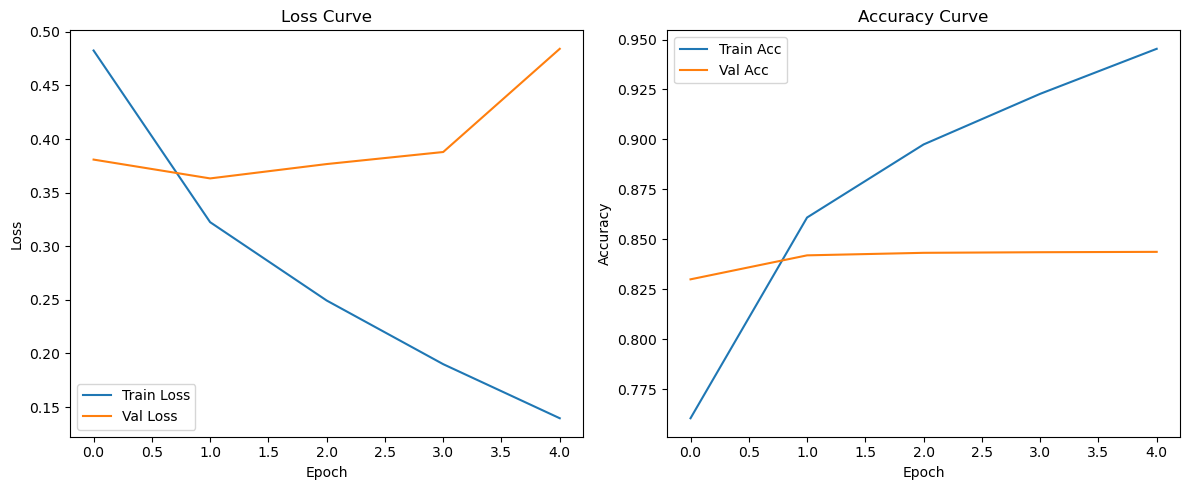

Evaluating: 100%|██████████| 1524/1524 [00:04<00:00, 328.57it/s]

Test Loss: 0.4843, Test Accuracy: 0.8332


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import sentencepiece as spm
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# --- 1. 데이터 불러오기 및 전처리 ---
# 데이터 파일 경로를 변수에 저장합니다.
train_path = "~/work/going_deeper/2/ratings_train.txt"
test_path  = "~/work/going_deeper/2/ratings_test.txt"

# Pandas를 사용하여 훈련 및 테스트 데이터셋을 각각 로드합니다.
# 파일이 탭(\t)으로 구분되어 있고, UTF-8 인코딩을 사용합니다.
train_df = pd.read_csv(train_path, sep="\t", encoding="utf-8")
test_df  = pd.read_csv(test_path, sep="\t", encoding="utf-8")

def clean_text(text):
    if pd.isnull(text):
        return ""
    # 1. 한글, 숫자, 기본 문장부호만 남김
    text = re.sub(r"[^가-힣0-9\s.,!?]", " ", text)
    # 2. 반복 문자 축소 (ㅋㅋㅋㅋ → ㅋㅋ, ㅎㅎㅎ → ㅎㅎ)
    text = re.sub(r"(ㅋ)\1+", "ㅋㅋ", text)
    text = re.sub(r"(ㅎ)\1+", "ㅎㅎ", text)
    # 3. 공백 정리
    text = re.sub(r"\s+", " ", text).strip()
    return text

# 적용
train_df["document"] = train_df["document"].astype(str).apply(clean_text)
test_df["document"]  = test_df["document"].astype(str).apply(clean_text)

train_df = train_df.drop(columns=["id"])
test_df = test_df.drop(columns=["id"])

train_df = train_df.dropna()
test_df = test_df.dropna()

train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()

# 학습이 완료된 SentencePiece 모델을 로드합니다.
# 이 모델은 이미 'spm_bpe.model' 파일로 저장되어 있다고 가정합니다.
sp = spm.SentencePieceProcessor()
sp.load("spm_bpe.model")

# --- 2. 데이터 분할 및 데이터셋 클래스 정의 ---
# 'document' 컬럼의 길이를 계산하여 새로운 'doc_length' 컬럼에 저장합니다.
train_df["doc_length"] = train_df["document"].str.len()
# 리뷰 길이가 83자 미만인 데이터만 필터링합니다. 이는 긴 리뷰로 인한 노이즈를 줄이기 위함입니다.
train_df = train_df[(train_df["doc_length"] >= 20) & (train_df["doc_length"] < 83)]

# 모델 학습을 위해 훈련 데이터를 학습(train)과 검증(validation) 데이터셋으로 나눕니다.
# 'test_size=0.2'는 전체 데이터의 20%를 검증 데이터로 사용함을 의미합니다.
# 'random_state=42'는 재현 가능성을 위해 무작위성을 고정합니다.
# 'stratify=train_df["label"]'은 두 데이터셋의 'label' (긍정/부정) 비율이 동일하게 유지되도록 합니다.
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df["label"])

# 각 데이터셋의 크기를 출력하여 데이터 분할 결과를 확인합니다.
print(f"모델 학습용 데이터셋 크기: {len(train_df)}")
print(f"모델 검증용 데이터셋 크기: {len(val_df)}")
print(f"모델 테스트용 데이터셋 크기: {len(test_df)}")

# PAD 토큰 ID와 모델이 처리할 최대 시퀀스 길이를 정의합니다.
PAD_ID = sp.pad_id()
MAX_LEN = 96

class NSMCDataset(Dataset):
    """
    PyTorch 모델에 사용할 데이터셋 클래스입니다.
    데이터프레임(df)을 입력받아 텍스트와 라벨을 리스트 형태로 저장합니다.
    """
    def __init__(self, df):
        # 'document' 컬럼의 텍스트를 문자열로 변환하고 리스트로 만듭니다.
        self.texts = df["document"].astype(str).tolist()
        # 'label' 컬럼의 값을 정수로 변환하고 리스트로 만듭니다.
        self.labels = df["label"].astype(int).tolist()

    def __len__(self):
        # 데이터셋의 총 샘플 수를 반환합니다.
        return len(self.texts)

    def __getitem__(self, idx):
        # 주어진 인덱스(idx)에 해당하는 텍스트를 가져와 SentencePiece 모델로 인코딩합니다.
        # 'out_type=int'는 토큰을 정수 ID로 변환하도록 지정합니다.
        ids = sp.encode(self.texts[idx], out_type=int)
        # 반환할 딕셔너리를 구성합니다. input_ids는 토큰 ID 텐서, labels는 라벨 텐서입니다.
        # 이 클래스에서는 패딩을 하지 않고, 원본 길이의 시퀀스를 반환합니다.
        return {
            "input_ids": torch.tensor(ids, dtype=torch.long),
            "labels": torch.tensor(self.labels[idx], dtype=torch.long),
        }

def collate_fn(batch, max_len=96):
    """
    DataLoader가 배치 단위로 데이터를 묶을 때 사용되는 함수입니다.
    다양한 길이의 시퀀스를 배치 내에서 동일한 길이로 패딩합니다.
    """
    # 1) 배치 내의 각 아이템에서 'input_ids'와 'labels'를 분리하여 리스트에 모읍니다.
    # 이 때, 각 시퀀스는 MAX_LEN을 초과하지 않도록 잘라냅니다.
    input_ids = [item["input_ids"][:max_len] for item in batch]
    labels = [item["labels"] for item in batch]

    # 2) pad_sequence를 사용하여 시퀀스를 배치 내에서 가장 긴 시퀀스 길이에 맞춰 패딩합니다.
    # 'batch_first=True'로 설정하여 [batch_size, sequence_length] 형태가 되게 합니다.
    # 'padding_value=PAD_ID'는 빈 공간을 PAD 토큰 ID로 채우도록 지정합니다.
    input_ids = pad_sequence(input_ids, batch_first=True, padding_value=PAD_ID)

    # 3) 만약 패딩된 길이가 MAX_LEN보다 길면 (이는 거의 발생하지 않지만, 예외 처리) 강제로 잘라냅니다.
    if input_ids.size(1) > max_len:
        input_ids = input_ids[:, :max_len]

    # 4) labels는 'stack'을 사용하여 하나의 텐서로 결합합니다.
    labels = torch.stack(labels)

    # 최종 배치 데이터를 딕셔너리 형태로 반환합니다.
    return {
        "input_ids": input_ids,
        "labels": labels,
    }


# DataLoader를 설정하여 데이터를 배치 단위로 효율적으로 로드합니다.
# 'collate_fn' 매개변수에 위에서 정의한 함수를 전달하여 패딩을 처리하도록 합니다.
# 'shuffle=True'는 학습 데이터 로드 시 데이터를 섞어줍니다.
train_loader = DataLoader(NSMCDataset(train_df), batch_size=32, shuffle=True, collate_fn=collate_fn)
val_loader   = DataLoader(NSMCDataset(val_df), batch_size=32, shuffle=False, collate_fn=collate_fn)
test_loader  = DataLoader(NSMCDataset(test_df), batch_size=32, shuffle=False, collate_fn=collate_fn)

# --- 4. BiLSTM 모델 정의 ---
class BiLSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim=256, hidden_dim=128, num_classes=2, pad_idx=0):
        super(BiLSTMClassifier, self).__init__()
        # 임베딩 레이어: 토큰 ID를 고정된 길이의 벡터로 변환합니다.
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=pad_idx)
        # 양방향 LSTM 레이어: 시퀀스 데이터의 특징을 순방향과 역방향으로 모두 학습합니다.
        self.lstm = nn.LSTM(embed_dim, hidden_dim, num_layers=1, batch_first=True, bidirectional=True)
        # 최종 분류를 위한 선형 레이어: LSTM의 출력을 긍/부정 클래스 개수(2개)로 변환합니다.
        self.fc = nn.Linear(hidden_dim * 2, num_classes)
        # 드롭아웃 레이어: 학습 시 뉴런의 일부를 무작위로 비활성화하여 과적합을 방지합니다.
        self.dropout = nn.Dropout(0.5)

    def forward(self, input_ids):
        # 입력 ID를 임베딩 레이어에 통과시켜 벡터로 변환합니다.
        embedded = self.embedding(input_ids)
        # 임베딩된 데이터를 LSTM 레이어에 입력합니다.
        lstm_out, (h_n, c_n) = self.lstm(embedded)
        # 양방향 LSTM의 순방향 마지막 hidden state(h_n[-2,:,:])와
        # 역방향 마지막 hidden state(h_n[-1,:,:])를 합칩니다.
        hidden = torch.cat((h_n[-2, :, :], h_n[-1, :, :]), dim=1)
        # 합쳐진 hidden state에 드롭아웃을 적용하고 최종 분류 레이어를 통과시킵니다.
        out = self.dropout(hidden)
        logits = self.fc(out)
        return logits

# 모델, 손실 함수, 최적화 함수를 초기화합니다.
VOCAB_SIZE = sp.get_piece_size()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BiLSTMClassifier(vocab_size=VOCAB_SIZE).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# --- 5. 학습 및 평가 함수 정의 ---
def train_epoch(model, dataloader, criterion, optimizer, device):
    """한 에포크 동안 모델을 학습하는 함수"""
    model.train() # 모델을 학습 모드로 설정
    total_loss, total_correct = 0, 0
    for batch in tqdm(dataloader, desc="Training"):
        input_ids = batch["input_ids"].to(device)
        labels = batch["labels"].to(device)

        optimizer.zero_grad() # 그래디언트 초기화
        outputs = model(input_ids)
        loss = criterion(outputs, labels) # 손실 계산
        loss.backward() # 역전파
        optimizer.step() # 매개변수 업데이트

        total_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        total_correct += (preds == labels).sum().item()
    return total_loss / len(dataloader), total_correct / len(dataloader.dataset)

def eval_epoch(model, dataloader, criterion, device):
    """한 에포크 동안 모델을 평가하는 함수"""
    model.eval() # 모델을 평가 모드로 설정
    total_loss, total_correct = 0, 0
    with torch.no_grad(): # 평가 시에는 그래디언트 계산을 비활성화
        for batch in tqdm(dataloader, desc="Evaluating"):
            input_ids = batch["input_ids"].to(device)
            labels = batch["labels"].to(device)
            outputs = model(input_ids)
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            total_correct += (preds == labels).sum().item()
    return total_loss / len(dataloader), total_correct / len(dataloader.dataset)

# --- 6. 모델 학습 및 결과 시각화 ---
train_losses, val_losses = [], []
train_accs, val_accs = [], []

num_epochs = 5
for epoch in range(num_epochs):
    # 학습 및 검증 함수 호출
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc = eval_epoch(model, val_loader, criterion, device)

    # 손실 및 정확도 기록
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"[Epoch {epoch+1}/{num_epochs}] Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}")

# 학습된 모델 저장
torch.save(model.state_dict(), "bilstm_sentpiece_bpe_2083.pth")

# 학습 곡선 시각화
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")

plt.subplot(1,2,2)
plt.plot(train_accs, label="Train Acc")
plt.plot(val_accs, label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")

plt.tight_layout()
plt.show()

# --- 7. 최종 모델 평가 ---
# 저장된 모델을 로드하여 테스트 데이터셋으로 성능 평가
model.load_state_dict(torch.load("bilstm_sentpiece_bpe_2083.pth"))
test_loss, test_acc = eval_epoch(model, test_loader, criterion, device)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

모델 학습용 데이터셋 크기: 106515
모델 검증용 데이터셋 크기: 26629
모델 테스트용 데이터셋 크기: 48740


Evaluating: 100%|██████████| 833/833 [00:02<00:00, 355.34it/s]


[Epoch 1/5] Train Loss: 0.4672, Acc: 0.7746 | Val Loss: 0.3722, Acc: 0.8345


Evaluating: 100%|██████████| 833/833 [00:02<00:00, 348.61it/s]


[Epoch 2/5] Train Loss: 0.3261, Acc: 0.8605 | Val Loss: 0.3521, Acc: 0.8447


Evaluating: 100%|██████████| 833/833 [00:02<00:00, 352.22it/s]


[Epoch 3/5] Train Loss: 0.2763, Acc: 0.8846 | Val Loss: 0.3497, Acc: 0.8479


Evaluating: 100%|██████████| 833/833 [00:02<00:00, 356.77it/s]


[Epoch 4/5] Train Loss: 0.2322, Acc: 0.9043 | Val Loss: 0.3617, Acc: 0.8473


Evaluating: 100%|██████████| 833/833 [00:02<00:00, 359.91it/s]


[Epoch 5/5] Train Loss: 0.1918, Acc: 0.9225 | Val Loss: 0.3945, Acc: 0.8472


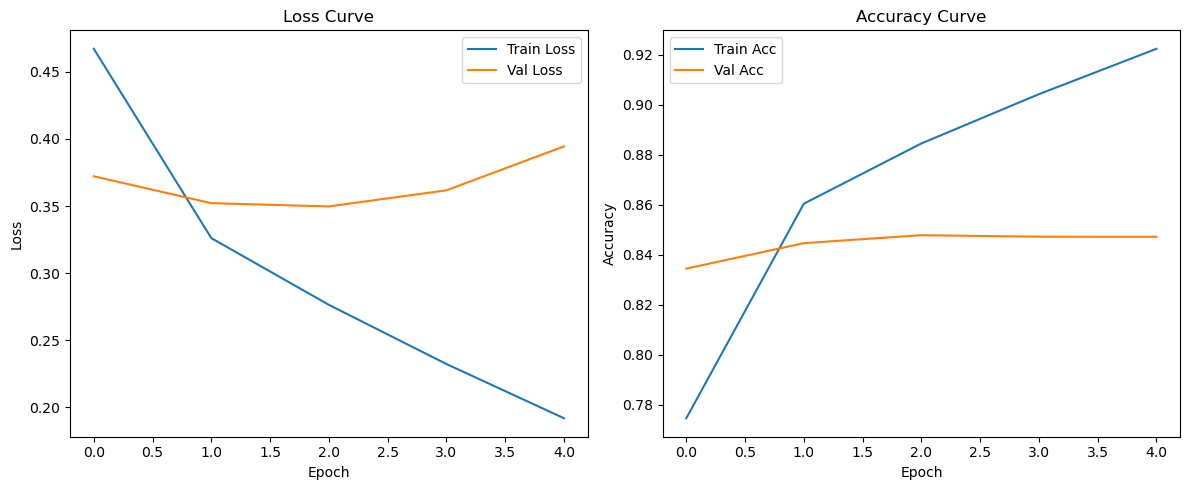

Evaluating: 100%|██████████| 1524/1524 [00:04<00:00, 312.38it/s]

Test Loss: 0.3896, Test Accuracy: 0.8484


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import sentencepiece as spm
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# --- 1. 데이터 불러오기 및 전처리 ---
# 데이터 파일 경로를 변수에 저장합니다.
train_path = "~/work/going_deeper/2/ratings_train.txt"
test_path  = "~/work/going_deeper/2/ratings_test.txt"

# Pandas를 사용하여 훈련 및 테스트 데이터셋을 각각 로드합니다.
# 파일이 탭(\t)으로 구분되어 있고, UTF-8 인코딩을 사용합니다.
train_df = pd.read_csv(train_path, sep="\t", encoding="utf-8")
test_df  = pd.read_csv(test_path, sep="\t", encoding="utf-8")

def clean_text(text):
    if pd.isnull(text):
        return ""
    # 1. 한글, 숫자, 기본 문장부호만 남김
    text = re.sub(r"[^가-힣0-9\s.,!?]", " ", text)
    # 2. 반복 문자 축소 (ㅋㅋㅋㅋ → ㅋㅋ, ㅎㅎㅎ → ㅎㅎ)
    text = re.sub(r"(ㅋ)\1+", "ㅋㅋ", text)
    text = re.sub(r"(ㅎ)\1+", "ㅎㅎ", text)
    # 3. 공백 정리
    text = re.sub(r"\s+", " ", text).strip()
    return text

# 적용
train_df["document"] = train_df["document"].astype(str).apply(clean_text)
test_df["document"]  = test_df["document"].astype(str).apply(clean_text)

train_df = train_df.drop(columns=["id"])
test_df = test_df.drop(columns=["id"])

train_df = train_df.dropna()
test_df = test_df.dropna()

train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()

# 학습이 완료된 SentencePiece 모델을 로드합니다.
# 이 모델은 이미 'spm_bpe.model' 파일로 저장되어 있다고 가정합니다.
sp = spm.SentencePieceProcessor()
sp.load("spm_bpe.model")

# --- 2. 데이터 분할 및 데이터셋 클래스 정의 ---
# 'document' 컬럼의 길이를 계산하여 새로운 'doc_length' 컬럼에 저장합니다.
train_df["doc_length"] = train_df["document"].str.len()
# 리뷰 길이가 83자 미만인 데이터만 필터링합니다. 이는 긴 리뷰로 인한 노이즈를 줄이기 위함입니다.
train_df = train_df[(train_df["doc_length"] >= 10)]

# 모델 학습을 위해 훈련 데이터를 학습(train)과 검증(validation) 데이터셋으로 나눕니다.
# 'test_size=0.2'는 전체 데이터의 20%를 검증 데이터로 사용함을 의미합니다.
# 'random_state=42'는 재현 가능성을 위해 무작위성을 고정합니다.
# 'stratify=train_df["label"]'은 두 데이터셋의 'label' (긍정/부정) 비율이 동일하게 유지되도록 합니다.
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df["label"])

# 각 데이터셋의 크기를 출력하여 데이터 분할 결과를 확인합니다.
print(f"모델 학습용 데이터셋 크기: {len(train_df)}")
print(f"모델 검증용 데이터셋 크기: {len(val_df)}")
print(f"모델 테스트용 데이터셋 크기: {len(test_df)}")

# PAD 토큰 ID와 모델이 처리할 최대 시퀀스 길이를 정의합니다.
PAD_ID = sp.pad_id()
MAX_LEN = 96

class NSMCDataset(Dataset):
    """
    PyTorch 모델에 사용할 데이터셋 클래스입니다.
    데이터프레임(df)을 입력받아 텍스트와 라벨을 리스트 형태로 저장합니다.
    """
    def __init__(self, df):
        # 'document' 컬럼의 텍스트를 문자열로 변환하고 리스트로 만듭니다.
        self.texts = df["document"].astype(str).tolist()
        # 'label' 컬럼의 값을 정수로 변환하고 리스트로 만듭니다.
        self.labels = df["label"].astype(int).tolist()

    def __len__(self):
        # 데이터셋의 총 샘플 수를 반환합니다.
        return len(self.texts)

    def __getitem__(self, idx):
        # 주어진 인덱스(idx)에 해당하는 텍스트를 가져와 SentencePiece 모델로 인코딩합니다.
        # 'out_type=int'는 토큰을 정수 ID로 변환하도록 지정합니다.
        ids = sp.encode(self.texts[idx], out_type=int)
        # 반환할 딕셔너리를 구성합니다. input_ids는 토큰 ID 텐서, labels는 라벨 텐서입니다.
        # 이 클래스에서는 패딩을 하지 않고, 원본 길이의 시퀀스를 반환합니다.
        return {
            "input_ids": torch.tensor(ids, dtype=torch.long),
            "labels": torch.tensor(self.labels[idx], dtype=torch.long),
        }

def collate_fn(batch, max_len=96):
    """
    DataLoader가 배치 단위로 데이터를 묶을 때 사용되는 함수입니다.
    다양한 길이의 시퀀스를 배치 내에서 동일한 길이로 패딩합니다.
    """
    # 1) 배치 내의 각 아이템에서 'input_ids'와 'labels'를 분리하여 리스트에 모읍니다.
    # 이 때, 각 시퀀스는 MAX_LEN을 초과하지 않도록 잘라냅니다.
    input_ids = [item["input_ids"][:max_len] for item in batch]
    labels = [item["labels"] for item in batch]

    # 2) pad_sequence를 사용하여 시퀀스를 배치 내에서 가장 긴 시퀀스 길이에 맞춰 패딩합니다.
    # 'batch_first=True'로 설정하여 [batch_size, sequence_length] 형태가 되게 합니다.
    # 'padding_value=PAD_ID'는 빈 공간을 PAD 토큰 ID로 채우도록 지정합니다.
    input_ids = pad_sequence(input_ids, batch_first=True, padding_value=PAD_ID)

    # 3) 만약 패딩된 길이가 MAX_LEN보다 길면 (이는 거의 발생하지 않지만, 예외 처리) 강제로 잘라냅니다.
    if input_ids.size(1) > max_len:
        input_ids = input_ids[:, :max_len]

    # 4) labels는 'stack'을 사용하여 하나의 텐서로 결합합니다.
    labels = torch.stack(labels)

    # 최종 배치 데이터를 딕셔너리 형태로 반환합니다.
    return {
        "input_ids": input_ids,
        "labels": labels,
    }


# DataLoader를 설정하여 데이터를 배치 단위로 효율적으로 로드합니다.
# 'collate_fn' 매개변수에 위에서 정의한 함수를 전달하여 패딩을 처리하도록 합니다.
# 'shuffle=True'는 학습 데이터 로드 시 데이터를 섞어줍니다.
train_loader = DataLoader(NSMCDataset(train_df), batch_size=32, shuffle=True, collate_fn=collate_fn)
val_loader   = DataLoader(NSMCDataset(val_df), batch_size=32, shuffle=False, collate_fn=collate_fn)
test_loader  = DataLoader(NSMCDataset(test_df), batch_size=32, shuffle=False, collate_fn=collate_fn)

# --- 4. BiLSTM 모델 정의 ---
class BiLSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim=256, hidden_dim=128, num_classes=2, pad_idx=0):
        super(BiLSTMClassifier, self).__init__()
        # 임베딩 레이어: 토큰 ID를 고정된 길이의 벡터로 변환합니다.
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=pad_idx)
        # 양방향 LSTM 레이어: 시퀀스 데이터의 특징을 순방향과 역방향으로 모두 학습합니다.
        self.lstm = nn.LSTM(embed_dim, hidden_dim, num_layers=1, batch_first=True, bidirectional=True)
        # 최종 분류를 위한 선형 레이어: LSTM의 출력을 긍/부정 클래스 개수(2개)로 변환합니다.
        self.fc = nn.Linear(hidden_dim * 2, num_classes)
        # 드롭아웃 레이어: 학습 시 뉴런의 일부를 무작위로 비활성화하여 과적합을 방지합니다.
        self.dropout = nn.Dropout(0.5)

    def forward(self, input_ids):
        # 입력 ID를 임베딩 레이어에 통과시켜 벡터로 변환합니다.
        embedded = self.embedding(input_ids)
        # 임베딩된 데이터를 LSTM 레이어에 입력합니다.
        lstm_out, (h_n, c_n) = self.lstm(embedded)
        # 양방향 LSTM의 순방향 마지막 hidden state(h_n[-2,:,:])와
        # 역방향 마지막 hidden state(h_n[-1,:,:])를 합칩니다.
        hidden = torch.cat((h_n[-2, :, :], h_n[-1, :, :]), dim=1)
        # 합쳐진 hidden state에 드롭아웃을 적용하고 최종 분류 레이어를 통과시킵니다.
        out = self.dropout(hidden)
        logits = self.fc(out)
        return logits

# 모델, 손실 함수, 최적화 함수를 초기화합니다.
VOCAB_SIZE = sp.get_piece_size()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BiLSTMClassifier(vocab_size=VOCAB_SIZE).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# --- 5. 학습 및 평가 함수 정의 ---
def train_epoch(model, dataloader, criterion, optimizer, device):
    """한 에포크 동안 모델을 학습하는 함수"""
    model.train() # 모델을 학습 모드로 설정
    total_loss, total_correct = 0, 0
    for batch in tqdm(dataloader, desc="Training"):
        input_ids = batch["input_ids"].to(device)
        labels = batch["labels"].to(device)

        optimizer.zero_grad() # 그래디언트 초기화
        outputs = model(input_ids)
        loss = criterion(outputs, labels) # 손실 계산
        loss.backward() # 역전파
        optimizer.step() # 매개변수 업데이트

        total_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        total_correct += (preds == labels).sum().item()
    return total_loss / len(dataloader), total_correct / len(dataloader.dataset)

def eval_epoch(model, dataloader, criterion, device):
    """한 에포크 동안 모델을 평가하는 함수"""
    model.eval() # 모델을 평가 모드로 설정
    total_loss, total_correct = 0, 0
    with torch.no_grad(): # 평가 시에는 그래디언트 계산을 비활성화
        for batch in tqdm(dataloader, desc="Evaluating"):
            input_ids = batch["input_ids"].to(device)
            labels = batch["labels"].to(device)
            outputs = model(input_ids)
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            total_correct += (preds == labels).sum().item()
    return total_loss / len(dataloader), total_correct / len(dataloader.dataset)

# --- 6. 모델 학습 및 결과 시각화 ---
train_losses, val_losses = [], []
train_accs, val_accs = [], []

num_epochs = 5
for epoch in range(num_epochs):
    # 학습 및 검증 함수 호출
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc = eval_epoch(model, val_loader, criterion, device)

    # 손실 및 정확도 기록
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"[Epoch {epoch+1}/{num_epochs}] Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}")

# 학습된 모델 저장
torch.save(model.state_dict(), "bilstm_sentpiece_bpe_10.pth")

# 학습 곡선 시각화
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")

plt.subplot(1,2,2)
plt.plot(train_accs, label="Train Acc")
plt.plot(val_accs, label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")

plt.tight_layout()
plt.show()

# --- 7. 최종 모델 평가 ---
# 저장된 모델을 로드하여 테스트 데이터셋으로 성능 평가
model.load_state_dict(torch.load("bilstm_sentpiece_bpe_10.pth"))
test_loss, test_acc = eval_epoch(model, test_loader, criterion, device)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

모델 학습용 데이터셋 크기: 115420
모델 검증용 데이터셋 크기: 28856
모델 테스트용 데이터셋 크기: 48740


Evaluating: 100%|██████████| 902/902 [00:02<00:00, 365.19it/s]


[Epoch 1/5] Train Loss: 0.4488, Acc: 0.7856 | Val Loss: 0.3659, Acc: 0.8381


Evaluating: 100%|██████████| 902/902 [00:02<00:00, 367.87it/s]


[Epoch 2/5] Train Loss: 0.3156, Acc: 0.8648 | Val Loss: 0.3468, Acc: 0.8481


Evaluating: 100%|██████████| 902/902 [00:02<00:00, 360.45it/s]


[Epoch 3/5] Train Loss: 0.2663, Acc: 0.8880 | Val Loss: 0.3492, Acc: 0.8484


Evaluating: 100%|██████████| 902/902 [00:02<00:00, 357.88it/s]


[Epoch 4/5] Train Loss: 0.2217, Acc: 0.9093 | Val Loss: 0.3706, Acc: 0.8520


Evaluating: 100%|██████████| 902/902 [00:02<00:00, 363.83it/s]


[Epoch 5/5] Train Loss: 0.1812, Acc: 0.9276 | Val Loss: 0.3929, Acc: 0.8493


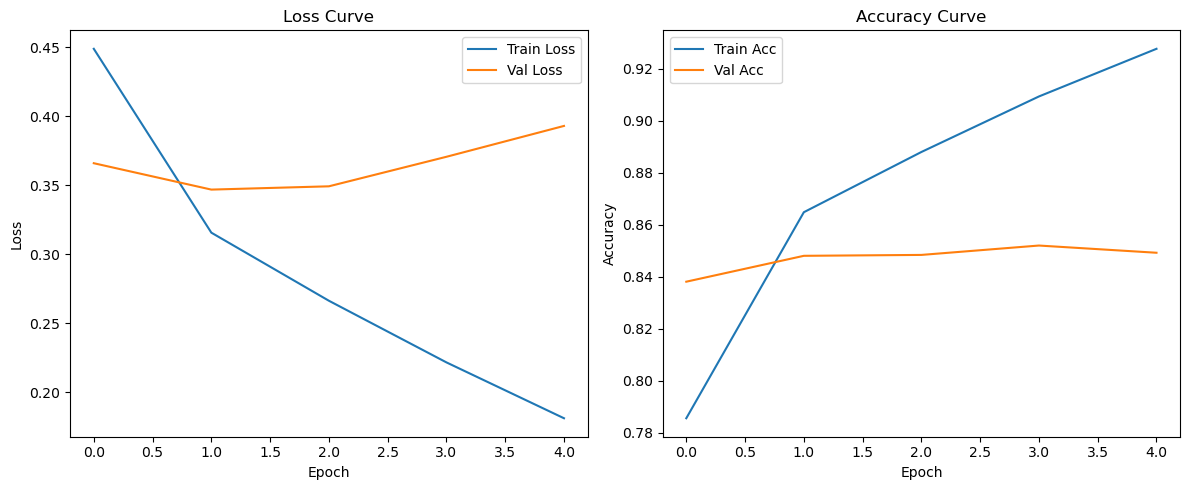

Evaluating: 100%|██████████| 1524/1524 [00:04<00:00, 332.79it/s]

Test Loss: 0.3903, Test Accuracy: 0.8515


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import sentencepiece as spm
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# --- 1. 데이터 불러오기 및 전처리 ---
# 데이터 파일 경로를 변수에 저장합니다.
train_path = "~/work/going_deeper/2/ratings_train.txt"
test_path  = "~/work/going_deeper/2/ratings_test.txt"

# Pandas를 사용하여 훈련 및 테스트 데이터셋을 각각 로드합니다.
# 파일이 탭(\t)으로 구분되어 있고, UTF-8 인코딩을 사용합니다.
train_df = pd.read_csv(train_path, sep="\t", encoding="utf-8")
test_df  = pd.read_csv(test_path, sep="\t", encoding="utf-8")

def clean_text(text):
    if pd.isnull(text):
        return ""
    # 1. 한글, 숫자, 기본 문장부호만 남김
    text = re.sub(r"[^가-힣0-9\s.,!?]", " ", text)
    # 2. 반복 문자 축소 (ㅋㅋㅋㅋ → ㅋㅋ, ㅎㅎㅎ → ㅎㅎ)
    text = re.sub(r"(ㅋ)\1+", "ㅋㅋ", text)
    text = re.sub(r"(ㅎ)\1+", "ㅎㅎ", text)
    # 3. 공백 정리
    text = re.sub(r"\s+", " ", text).strip()
    return text

# 적용
train_df["document"] = train_df["document"].astype(str).apply(clean_text)
test_df["document"]  = test_df["document"].astype(str).apply(clean_text)

train_df = train_df.drop(columns=["id"])
test_df = test_df.drop(columns=["id"])

train_df = train_df.dropna()
test_df = test_df.dropna()

train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()

# 학습이 완료된 SentencePiece 모델을 로드합니다.
# 이 모델은 이미 'spm_bpe.model' 파일로 저장되어 있다고 가정합니다.
sp = spm.SentencePieceProcessor()
sp.load("spm_bpe.model")

# --- 2. 데이터 분할 및 데이터셋 클래스 정의 ---
# 'document' 컬럼의 길이를 계산하여 새로운 'doc_length' 컬럼에 저장합니다.
train_df["doc_length"] = train_df["document"].str.len()
# 리뷰 길이가 83자 미만인 데이터만 필터링합니다. 이는 긴 리뷰로 인한 노이즈를 줄이기 위함입니다.
train_df = train_df[(train_df["doc_length"] >= 3)]

# 모델 학습을 위해 훈련 데이터를 학습(train)과 검증(validation) 데이터셋으로 나눕니다.
# 'test_size=0.2'는 전체 데이터의 20%를 검증 데이터로 사용함을 의미합니다.
# 'random_state=42'는 재현 가능성을 위해 무작위성을 고정합니다.
# 'stratify=train_df["label"]'은 두 데이터셋의 'label' (긍정/부정) 비율이 동일하게 유지되도록 합니다.
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df["label"])

# 각 데이터셋의 크기를 출력하여 데이터 분할 결과를 확인합니다.
print(f"모델 학습용 데이터셋 크기: {len(train_df)}")
print(f"모델 검증용 데이터셋 크기: {len(val_df)}")
print(f"모델 테스트용 데이터셋 크기: {len(test_df)}")

# PAD 토큰 ID와 모델이 처리할 최대 시퀀스 길이를 정의합니다.
PAD_ID = sp.pad_id()
MAX_LEN = 96

class NSMCDataset(Dataset):
    """
    PyTorch 모델에 사용할 데이터셋 클래스입니다.
    데이터프레임(df)을 입력받아 텍스트와 라벨을 리스트 형태로 저장합니다.
    """
    def __init__(self, df):
        # 'document' 컬럼의 텍스트를 문자열로 변환하고 리스트로 만듭니다.
        self.texts = df["document"].astype(str).tolist()
        # 'label' 컬럼의 값을 정수로 변환하고 리스트로 만듭니다.
        self.labels = df["label"].astype(int).tolist()

    def __len__(self):
        # 데이터셋의 총 샘플 수를 반환합니다.
        return len(self.texts)

    def __getitem__(self, idx):
        # 주어진 인덱스(idx)에 해당하는 텍스트를 가져와 SentencePiece 모델로 인코딩합니다.
        # 'out_type=int'는 토큰을 정수 ID로 변환하도록 지정합니다.
        ids = sp.encode(self.texts[idx], out_type=int)
        # 반환할 딕셔너리를 구성합니다. input_ids는 토큰 ID 텐서, labels는 라벨 텐서입니다.
        # 이 클래스에서는 패딩을 하지 않고, 원본 길이의 시퀀스를 반환합니다.
        return {
            "input_ids": torch.tensor(ids, dtype=torch.long),
            "labels": torch.tensor(self.labels[idx], dtype=torch.long),
        }

def collate_fn(batch, max_len=96):
    """
    DataLoader가 배치 단위로 데이터를 묶을 때 사용되는 함수입니다.
    다양한 길이의 시퀀스를 배치 내에서 동일한 길이로 패딩합니다.
    """
    # 1) 배치 내의 각 아이템에서 'input_ids'와 'labels'를 분리하여 리스트에 모읍니다.
    # 이 때, 각 시퀀스는 MAX_LEN을 초과하지 않도록 잘라냅니다.
    input_ids = [item["input_ids"][:max_len] for item in batch]
    labels = [item["labels"] for item in batch]

    # 2) pad_sequence를 사용하여 시퀀스를 배치 내에서 가장 긴 시퀀스 길이에 맞춰 패딩합니다.
    # 'batch_first=True'로 설정하여 [batch_size, sequence_length] 형태가 되게 합니다.
    # 'padding_value=PAD_ID'는 빈 공간을 PAD 토큰 ID로 채우도록 지정합니다.
    input_ids = pad_sequence(input_ids, batch_first=True, padding_value=PAD_ID)

    # 3) 만약 패딩된 길이가 MAX_LEN보다 길면 (이는 거의 발생하지 않지만, 예외 처리) 강제로 잘라냅니다.
    if input_ids.size(1) > max_len:
        input_ids = input_ids[:, :max_len]

    # 4) labels는 'stack'을 사용하여 하나의 텐서로 결합합니다.
    labels = torch.stack(labels)

    # 최종 배치 데이터를 딕셔너리 형태로 반환합니다.
    return {
        "input_ids": input_ids,
        "labels": labels,
    }


# DataLoader를 설정하여 데이터를 배치 단위로 효율적으로 로드합니다.
# 'collate_fn' 매개변수에 위에서 정의한 함수를 전달하여 패딩을 처리하도록 합니다.
# 'shuffle=True'는 학습 데이터 로드 시 데이터를 섞어줍니다.
train_loader = DataLoader(NSMCDataset(train_df), batch_size=32, shuffle=True, collate_fn=collate_fn)
val_loader   = DataLoader(NSMCDataset(val_df), batch_size=32, shuffle=False, collate_fn=collate_fn)
test_loader  = DataLoader(NSMCDataset(test_df), batch_size=32, shuffle=False, collate_fn=collate_fn)

# --- 4. BiLSTM 모델 정의 ---
class BiLSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim=256, hidden_dim=128, num_classes=2, pad_idx=0):
        super(BiLSTMClassifier, self).__init__()
        # 임베딩 레이어: 토큰 ID를 고정된 길이의 벡터로 변환합니다.
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=pad_idx)
        # 양방향 LSTM 레이어: 시퀀스 데이터의 특징을 순방향과 역방향으로 모두 학습합니다.
        self.lstm = nn.LSTM(embed_dim, hidden_dim, num_layers=1, batch_first=True, bidirectional=True)
        # 최종 분류를 위한 선형 레이어: LSTM의 출력을 긍/부정 클래스 개수(2개)로 변환합니다.
        self.fc = nn.Linear(hidden_dim * 2, num_classes)
        # 드롭아웃 레이어: 학습 시 뉴런의 일부를 무작위로 비활성화하여 과적합을 방지합니다.
        self.dropout = nn.Dropout(0.5)

    def forward(self, input_ids):
        # 입력 ID를 임베딩 레이어에 통과시켜 벡터로 변환합니다.
        embedded = self.embedding(input_ids)
        # 임베딩된 데이터를 LSTM 레이어에 입력합니다.
        lstm_out, (h_n, c_n) = self.lstm(embedded)
        # 양방향 LSTM의 순방향 마지막 hidden state(h_n[-2,:,:])와
        # 역방향 마지막 hidden state(h_n[-1,:,:])를 합칩니다.
        hidden = torch.cat((h_n[-2, :, :], h_n[-1, :, :]), dim=1)
        # 합쳐진 hidden state에 드롭아웃을 적용하고 최종 분류 레이어를 통과시킵니다.
        out = self.dropout(hidden)
        logits = self.fc(out)
        return logits

# 모델, 손실 함수, 최적화 함수를 초기화합니다.
VOCAB_SIZE = sp.get_piece_size()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BiLSTMClassifier(vocab_size=VOCAB_SIZE).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# --- 5. 학습 및 평가 함수 정의 ---
def train_epoch(model, dataloader, criterion, optimizer, device):
    """한 에포크 동안 모델을 학습하는 함수"""
    model.train() # 모델을 학습 모드로 설정
    total_loss, total_correct = 0, 0
    for batch in tqdm(dataloader, desc="Training"):
        input_ids = batch["input_ids"].to(device)
        labels = batch["labels"].to(device)

        optimizer.zero_grad() # 그래디언트 초기화
        outputs = model(input_ids)
        loss = criterion(outputs, labels) # 손실 계산
        loss.backward() # 역전파
        optimizer.step() # 매개변수 업데이트

        total_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        total_correct += (preds == labels).sum().item()
    return total_loss / len(dataloader), total_correct / len(dataloader.dataset)

def eval_epoch(model, dataloader, criterion, device):
    """한 에포크 동안 모델을 평가하는 함수"""
    model.eval() # 모델을 평가 모드로 설정
    total_loss, total_correct = 0, 0
    with torch.no_grad(): # 평가 시에는 그래디언트 계산을 비활성화
        for batch in tqdm(dataloader, desc="Evaluating"):
            input_ids = batch["input_ids"].to(device)
            labels = batch["labels"].to(device)
            outputs = model(input_ids)
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            total_correct += (preds == labels).sum().item()
    return total_loss / len(dataloader), total_correct / len(dataloader.dataset)

# --- 6. 모델 학습 및 결과 시각화 ---
train_losses, val_losses = [], []
train_accs, val_accs = [], []

num_epochs = 5
for epoch in range(num_epochs):
    # 학습 및 검증 함수 호출
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc = eval_epoch(model, val_loader, criterion, device)

    # 손실 및 정확도 기록
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"[Epoch {epoch+1}/{num_epochs}] Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}")

# 학습된 모델 저장
torch.save(model.state_dict(), "bilstm_sentpiece_bpe_3.pth")

# 학습 곡선 시각화
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")

plt.subplot(1,2,2)
plt.plot(train_accs, label="Train Acc")
plt.plot(val_accs, label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")

plt.tight_layout()
plt.show()

# --- 7. 최종 모델 평가 ---
# 저장된 모델을 로드하여 테스트 데이터셋으로 성능 평가
model.load_state_dict(torch.load("bilstm_sentpiece_bpe_3.pth"))
test_loss, test_acc = eval_epoch(model, test_loader, criterion, device)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

네이버 영화 리뷰 텍스트를 대상으로 이진 분류 실험을 진행하였다.
데이터 전처리 과정에서는 한글과 숫자, 기본적인 특수문자(.,?! 등)만 남기고 나머지 문자는 모두 제거했으며, 반복되는 ‘ㅋㅋㅋㅋ’과 ‘ㅎㅎㅎㅎ’ 같은 표현은 각각 ‘ㅋㅋ’과 ‘ㅎㅎ’으로 축소하였다. 또한 불필요한 공백을 정리하고, 중복 데이터와 결측치가 포함된 행은 제거하여 학습 데이터를 정제하였다.

실험 모델로는 BiLSTM을 사용했는데, 이는 문맥을 양방향으로 학습할 수 있고 패딩 위치에 크게 의존하지 않는다는 장점이 있기 때문이다. 토크나이저는 SentencePiece와 MeCab을 비교하였으며, SentencePiece는 서브워드 단위로 텍스트를 분절하는 데이터 기반 토크나이저로 신조어나 희귀 단어 처리에 유리하고, MeCab은 한국어 형태소 분석을 기반으로 문법적·형태적 단위를 보존하는 데 강점이 있다.

실험 결과 SentencePiece Unigram은 Test Accuracy 0.8514, SentencePiece BPE는 0.8497, MeCab은 0.8653으로 나타났는데, 한국어 분류 문제인 만큼 형태소 분석 기반 토크나이저가 가장 좋은 성능을 보였다.

추가로 텍스트 길이 분포를 확인했을 때, 지나치게 짧거나 긴 리뷰는 노이즈일 수 있다고 보고 IQR 기준으로 데이터를 잘라 실험을 진행했다. 가장 성능이 좋지 않았던 SentencePiece BPE를 기준으로 비교한 결과,

0–83 길이 구간: Test Accuracy 0.8492
10–83 길이 구간: Test Accuracy 0.8473
20–83 길이 구간: Test Accuracy 0.8332

길이 기준을 많이 제한할수록 성능은 오히려 하락했다. 내가 노이즈라고 생각하는 부분이 모델에게는 반드시 노이즈가 아닐 수 있다는 점을 확인할 수 있었다.

그래서 반대로 지나치게 긴 텍스트는 그대로 두고, 짧은 텍스트만 제거해보았다. 그 결과,

10부터 길이 구간: Test Accuracy 0.8484
20부터 길이 구간: Test Accuracy 0.8378

이 경우에도 성능은 줄어들었다. 하지만 1–2 길이의 텍스트는 누구나 보아도 노이즈에 가까우므로 제거하는 것이 효과적일 수 있다고 판단하였다. 실제로 길이 3부터 시작하는 구간으로 제한했을 때는 Test Accuracy 0.8515로 오히려 성능이 소폭 상승했다.

이를 통해 텍스트 분류 과제에서 적절한 전처리와 노이즈 제거가 성능 향상에 큰 영향을 준다는 사실을 뼈저리게 느낄 수 있었다. 또한 토크나이저 역시 단순히 성능 비교 차원이 아니라, 해당 태스크의 특성과 목표에 맞게 선택해야 모델의 성능을 최대한으로 끌어올릴 수 있다는 점을 확인하였다.

